An Analysis of Contributing Factors in Severe and Fatal Road Traffic Accidents in the UK
2022/2023 CA683I Data Analytics and Data Mining
Project Group 30:
- Tristan Everitt
- Paul Ryan
- Toyatma Fedee
- Nuno Correia

https://github.com/te-dcu/CA683I-2023-Assignment

# Introduction

## Abstract
This study examined UK road traffic accidents between 2005 and 2017, focusing on determining the factors significantly related to accident severity.
Out of a total of 2,058,408 incidents, 14\% were classified as severe accidents.
The study employed a Chi-square test to analyze the relationship between 219 features and accident severity, discovering that 198 features rejected the null hypothesis, thus indicating a significant relationship with accident severity.

The most influential factors included vehicle type (motorcycles being particularly prominent), speed limits (specifically 60 miles per hour), the first point of impact, various vehicle maneuvers (such as waiting to go or slowing down), light conditions (darkness with no lighting), vehicles leaving the carriageway (either nearside or offside), hitting objects off the carriageway (notably trees), and junction location (not at or within 20 meters of a junction).
It is important to note that these factors do not imply causation but rather a higher prevalence of severe accidents compared to less severe ones.

To optimise the prediction of accident severity using a machine learning model, Recursive Feature Elimination (RFE) was utilised.
This method aimed to identify the ideal balance between the number of features and model performance.
The RFE process pinpointed 43 features as the optimal balance, suggesting that incorporating these top factors in the model is likely to yield the most accurate predictions for accident severity.

## Problem Statement
This study seeks to identify factors that contribute to serious road accidents using the Road Traffic Accident Data provided by the UK Department for Transport for the period of 2005--2017 containing 2,058,408 incidents.
A serious accident is defined as incidents requiring hospitalisation or resulting in fatalities.

- **The Null hypothesis ($H0$)**: There is no significant relationship between the factors under consideration and the severity of accidents.
- **The Alternative hypothesis ($H1$)**: There exists a significant relationship between at least one of the factors under consideration and the severity of accidents.

In order to assess the significance of the factors, we will use $\alpha=0.05$ for the null hypothesis ($H0$).
This $\alpha$ value represents a 95\% level of confidence that we wish to achieve before a factor rejects the null hypothesis.

By exploring the relationships between the factors and accident severity, the study aims to contribute to existing knowledge and provide insights that can help enhance road safety measures and potentially save lives.


# Environment Setup

In [1]:
# Common imports

import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pandas as pd
import numpy as np
import sys

In [2]:
import re
# Supress warnings since they can get verbose.
import warnings

warnings.filterwarnings('ignore')

random_state = 2023 # To keep results consistent across executions
is_colab = 'google.colab' in sys.modules

# Common utility functions used throughout the notebook
def print_title(title):
    print("\n{}".format(" {} ".format(title).center(75, '=')))

def calculate_nan_count_percentage(df):
    nan_count = df.loc[:, df.isna().sum() > 0].isna().sum().sort_values()
    nan_percent = round(nan_count / len(merged) * 100, 2)
    nan_summary = pd.concat([nan_count, nan_percent], axis=1)
    nan_summary.columns = ['NaN Count', 'NaN Percentage']
    return nan_summary

def to_snake_case(s):
    return re.sub(r'[-\s]+', '_', str(s)).lower()

# Data Selection

UK Road Safety: Traffic Accidents and Vehicles (2005-2017) Source: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles

Dataset built from data available from: https://roadtraffic.dft.gov.uk/custom-downloads/road-accidents

In [3]:
if os.path.isfile('Vehicle_Information.csv') and os.path.isfile('Accident_Information.csv'):
    print(f'Vehicle_Information.csv and Accident_Information.csv already downloaded')
else:
    print(f'Downloading Vehicle_Information.csv and Accident_Information.csv ....')
    # Download the public dataset from Kaggle and extract it

    if not 'kaggle' in sys.modules:
        !pip install kaggle

    os.environ['KAGGLE_USERNAME'] = 'tristaneveritt'
    os.environ['KAGGLE_KEY'] = 'b3ec95ed7887acb3271dbda55ee9ae80'

    !kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles
    !unzip -f uk-road-safety-accidents-and-vehicles.zip

! ls -lh

Vehicle_Information.csv and Accident_Information.csv already downloaded
total 1.4G
-rw-r--r--. 1 teveritt teveritt 673M Oct  3  2019 Accident_Information.csv
-rw-r--r--. 1 teveritt teveritt  33K Apr 15 13:43 Accidents_by_Day_of_the_Week_bar.png
-rw-r--r--. 1 teveritt teveritt  30K Apr 15 13:46 Accidents_by_Time_of_Day_bar.png
-rw-r--r--. 1 teveritt teveritt  24K Apr 15 13:44 Figure_BallTree.png
-rw-r--r--. 1 teveritt teveritt 6.9K Apr 15 13:10 LICENSE
-rw-r--r--. 1 teveritt teveritt 2.8M Apr 15 13:53 Notebook.ipynb
drwxr-xr-x. 1 teveritt teveritt    6 Apr 15 13:11 paper
-rw-r--r--. 1 teveritt teveritt  114 Apr 15 13:10 README.md
-rw-r--r--. 1 teveritt teveritt 143M Apr 15 13:17 uk-road-safety-accidents-and-vehicles.zip
-rw-r--r--. 1 teveritt teveritt 615M Oct  3  2019 Vehicle_Information.csv
-rw-r--r--. 1 teveritt teveritt  32K Apr 15 13:46 Vehicle_Types_FE.png


In [4]:
# Determine file encodings
!file -bi *.csv

text/csv; charset=us-ascii
text/csv; charset=us-ascii


In [5]:
# Load the accidents dataset into a dataframe

accidents = pd.read_csv(f'Accident_Information.csv', index_col='Accident_Index', encoding='latin1') # ISO-8859-1
print(f'Loaded accidents: {accidents.values.shape[0]} rows and {accidents.values.shape[1]} columns')

Loaded accidents: 2047256 rows and 33 columns


In [6]:
# Load the vehicles dataset into a dataframe

vehicles = pd.read_csv(f'Vehicle_Information.csv', index_col='Accident_Index', encoding='latin1') # ISO-8859-1
print(f'Loaded vehicles: {vehicles.values.shape[0]} rows and {vehicles.values.shape[1]} columns')

Loaded vehicles: 2177205 rows and 23 columns


# Exploratory Data Analysis (EDA)

## EDA: accidents

In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2047256 entries, 200501BS00001 to 2017984122617
Data columns (total 33 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   1st_Road_Class                               object 
 1   1st_Road_Number                              float64
 2   2nd_Road_Class                               object 
 3   2nd_Road_Number                              float64
 4   Accident_Severity                            object 
 5   Carriageway_Hazards                          object 
 6   Date                                         object 
 7   Day_of_Week                                  object 
 8   Did_Police_Officer_Attend_Scene_of_Accident  float64
 9   Junction_Control                             object 
 10  Junction_Detail                              object 
 11  Latitude                                     float64
 12  Light_Conditions                             object 
 13 

In [8]:
print(f'accidents: {accidents.values.shape[0]} rows and {accidents.values.shape[1]} columns')
print(f'accidents Range: {min(accidents.Date)} to {max(accidents.Date)}')

accidents: 2047256 rows and 33 columns
accidents Range: 2005-01-01 to 2017-12-31


There is several columns who's datatypes could not be read properly and are defaulting to object so they'll need to be converted to the appropiate datatype (e.g. Date is a datetime and not object)

In [9]:
accidents.nunique().sort_values().to_frame()

,0
InScotland,2
Urban_or_Rural_Area,3
Accident_Severity,3
Pedestrian_Crossing-Human_Control,3
Did_Police_Officer_Attend_Scene_of_Accident,3
Road_Surface_Conditions,6
Pedestrian_Crossing-Physical_Facilities,6
Light_Conditions,6
Junction_Control,6
1st_Road_Class,6


In [10]:
accidents.sample(n=10)

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
Accident_Index,,,,,,,,,,,,,,,,,,,,,
201420N029444,Unclassified,0.0,Unclassified,0.0,Slight,None,2014-06-04,Wednesday,1.0,Give way or uncontrolled,...,West Midlands,Wet or damp,Roundabout,None,20.0,07:40,Urban,Raining no high winds,2014,No
200532D007905,A,46.0,Unclassified,0.0,Slight,None,2005-01-19,Wednesday,1.0,Give way or uncontrolled,...,Lincolnshire,Wet or damp,Single carriageway,None,60.0,16:25,Rural,Raining no high winds,2005,No
200663AC16406,Unclassified,0.0,Unclassified,0.0,Slight,None,2006-05-05,Friday,1.0,Give way or uncontrolled,...,Dyfed-Powys,Dry,Single carriageway,None,30.0,07:45,Urban,Fine no high winds,2006,No
2015210027853,Unclassified,0.0,NaN,0.0,Fatal,None,2015-08-14,Friday,2.0,Data missing or out of range,...,Staffordshire,Wet or damp,Single carriageway,None,30.0,14:35,Urban,Raining no high winds,2015,No
201501QK50418,C,0.0,Unclassified,0.0,Slight,None,2015-06-02,Tuesday,1.0,Give way or uncontrolled,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,08:53,Urban,Fine no high winds,2015,No
2005520149632,Unclassified,0.0,Unclassified,0.0,Serious,None,2005-11-10,Thursday,1.0,Give way or uncontrolled,...,Avon and Somerset,Wet or damp,Single carriageway,None,30.0,08:45,Urban,Raining no high winds,2005,No
200801WW50735,A,218.0,C,0.0,Slight,None,2008-12-02,Tuesday,1.0,Give way or uncontrolled,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,15:11,Urban,Fine no high winds,2008,No
2012070144207,C,2002.0,NaN,0.0,Serious,None,2012-05-26,Saturday,1.0,Data missing or out of range,...,Cheshire,Dry,Single carriageway,None,30.0,13:12,Rural,Fine no high winds,2012,No
201320W017563,A,38.0,A,4400.0,Slight,None,2013-04-15,Monday,1.0,Give way or uncontrolled,...,West Midlands,Dry,Dual carriageway,None,40.0,09:51,Urban,Fine no high winds,2013,No


In [11]:
# Get a glimpse of unique values from columns that contain less than 50.
accidents.loc[:, accidents.nunique() <= 50].apply(pd.Series.unique).to_frame()

,0
1st_Road_Class,"[A, B, C, Unclassified, Motorway, A(M)]"
2nd_Road_Class,"[nan, C, Unclassified, B, A, Motorway, A(M)]"
Accident_Severity,"[Serious, Slight, Fatal]"
Carriageway_Hazards,"[None, Other object on road, Pedestrian in car..."
Day_of_Week,"[Tuesday, Wednesday, Thursday, Friday, Monday,..."
Did_Police_Officer_Attend_Scene_of_Accident,"[1.0, 2.0, 3.0, nan]"
Junction_Control,"[Data missing or out of range, Auto traffic si..."
Junction_Detail,"[Not at junction or within 20 metres, Crossroa..."
Light_Conditions,"[Daylight, Darkness - lights lit, Darkness - l..."
Number_of_Vehicles,"[1, 2, 4, 3, 5, 6, 8, 7, 13, 10, 11, 18, 9, 20..."


In [12]:
# The count and percentage of NaN values in columns that have more than 0 NaN values
nan_count = accidents.loc[:, accidents.isna().sum() > 0].isna().sum().sort_values()
nan_percent = round(nan_count / len(accidents) * 100, 2)
nan_summary = pd.concat([nan_count, nan_percent], axis=1)
nan_summary.columns = ['NaN Count', 'NaN Percentage']
nan_summary

,NaN Count,NaN Percentage
1st_Road_Number,2,0.00
Speed_limit,37,0.00
InScotland,53,0.00
Time,156,0.01
Location_Easting_OSGR,164,0.01
Location_Northing_OSGR,164,0.01
Latitude,174,0.01
Longitude,175,0.01
Did_Police_Officer_Attend_Scene_of_Accident,278,0.01
Pedestrian_Crossing-Human_Control,2920,0.14


14 of the 33 columns contain, with 2nd_Road_Class having a high amount of NaN

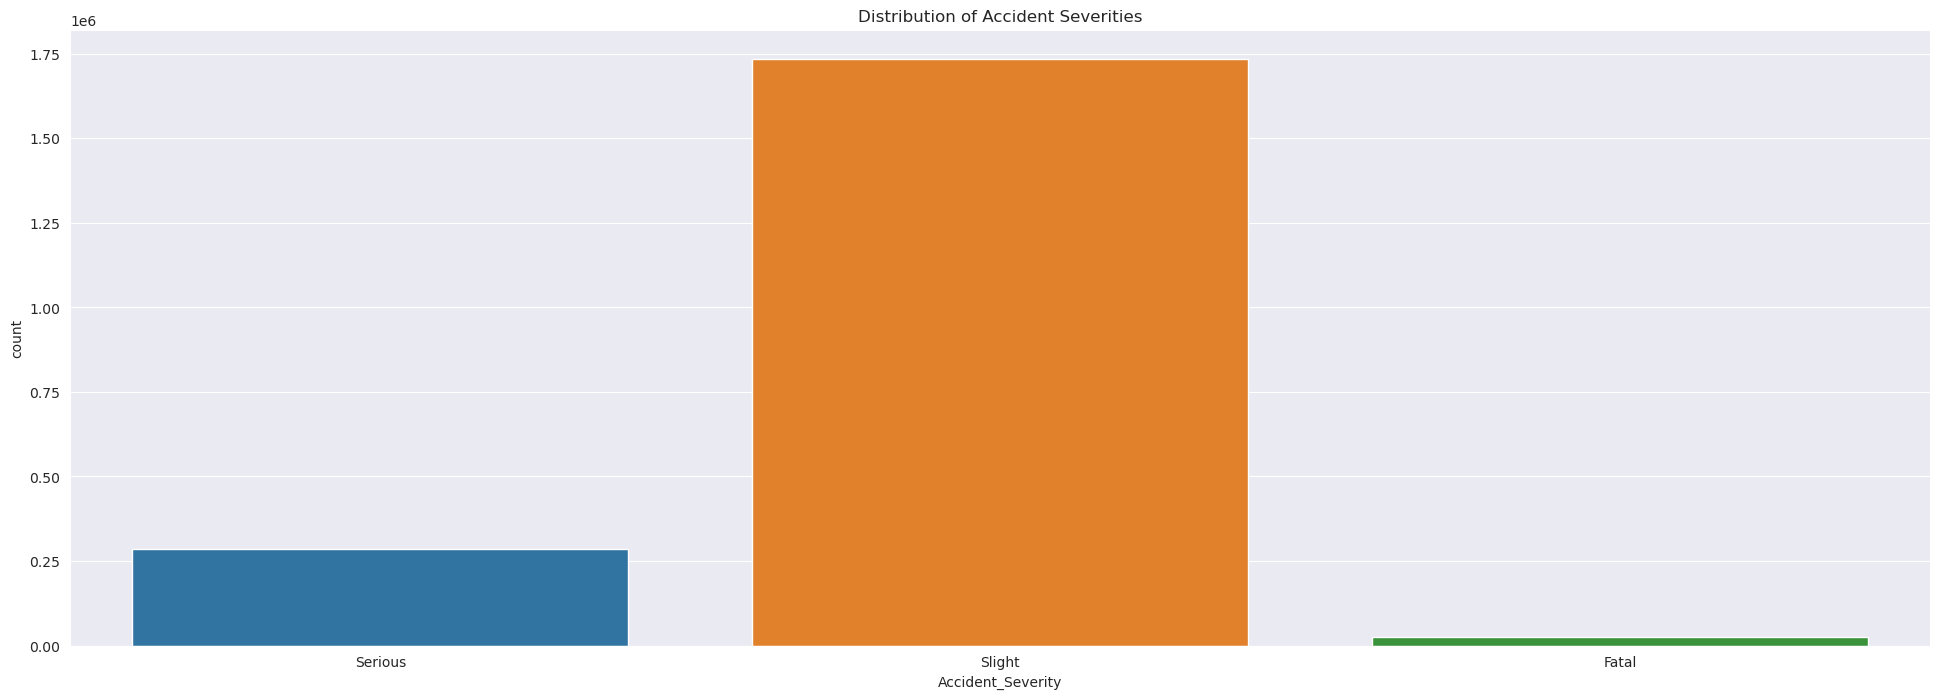

In [13]:
# View Distribution of accident severities

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Accident_Severity')
plt.title("Distribution of Accident Severities")
plt.show()

Severities `Fatal` and `Slight` are under-represented and over-represented, respectively.

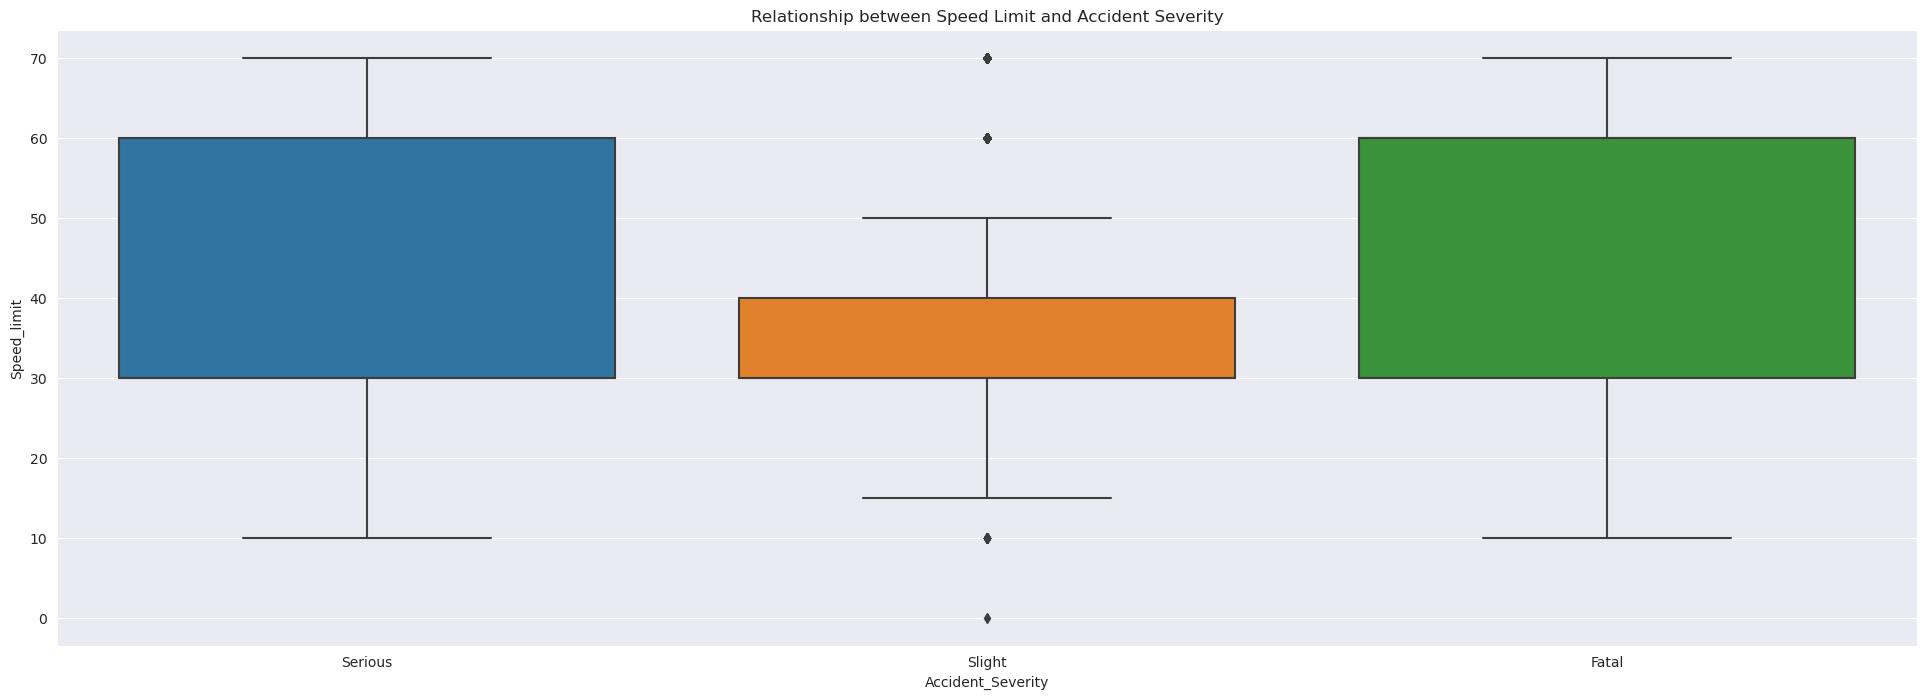

In [14]:
# Visualize the relationship between speed limit and accident severity
plt.figure(figsize=(24, 8))
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=accidents)
plt.title('Relationship between Speed Limit and Accident Severity')
plt.show()

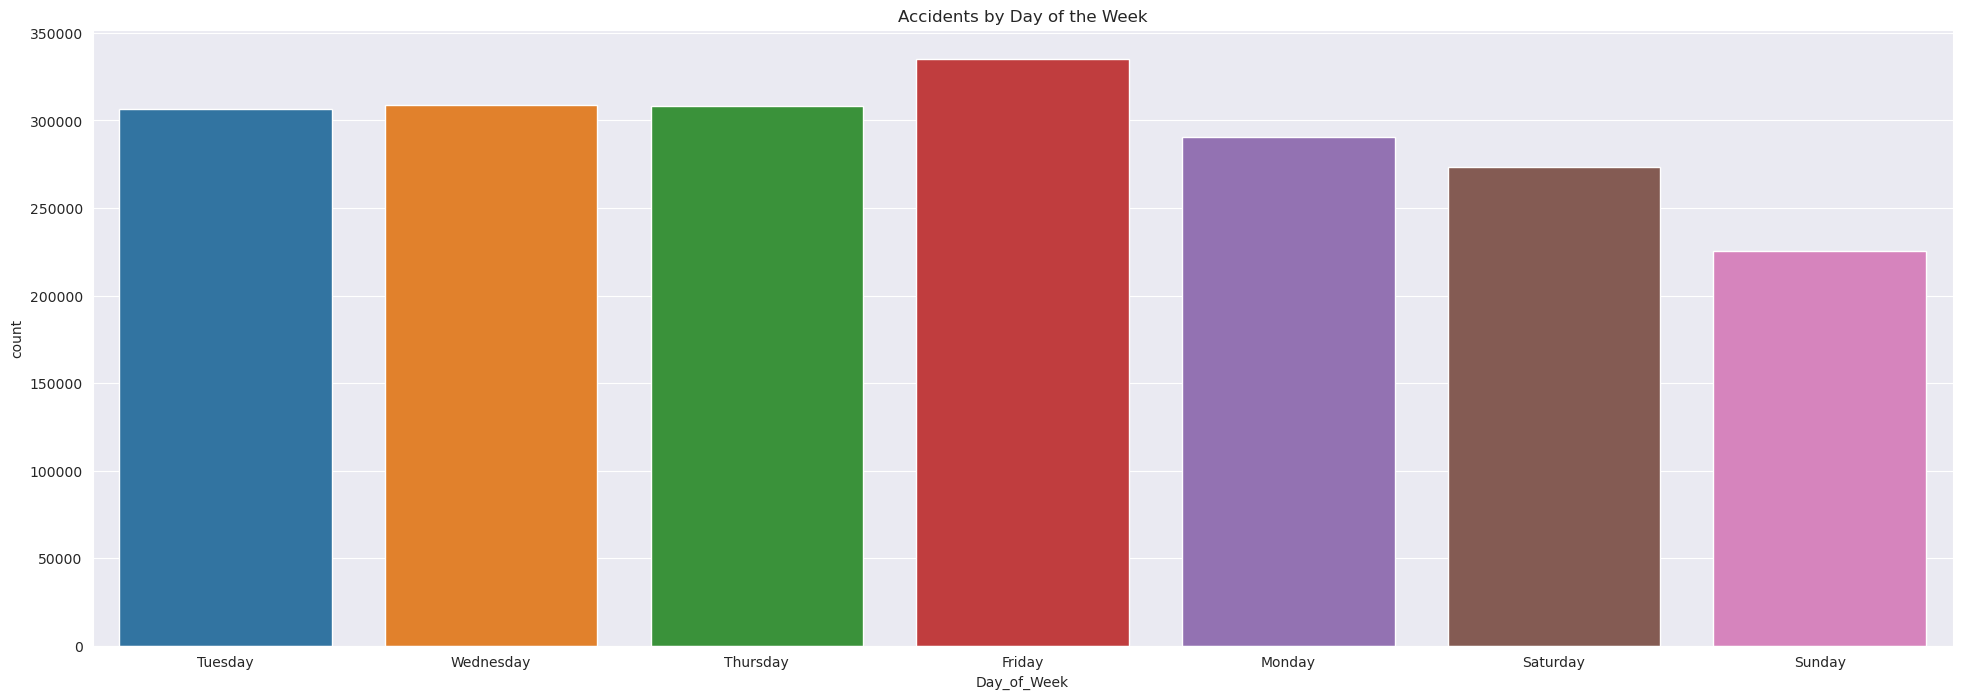

In [15]:
# View accidents by weekday

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Day_of_Week')
plt.title("Accidents by Day of the Week")
plt.savefig('Accidents_by_Day_of_the_Week_bar.png', bbox_inches='tight')
plt.show()

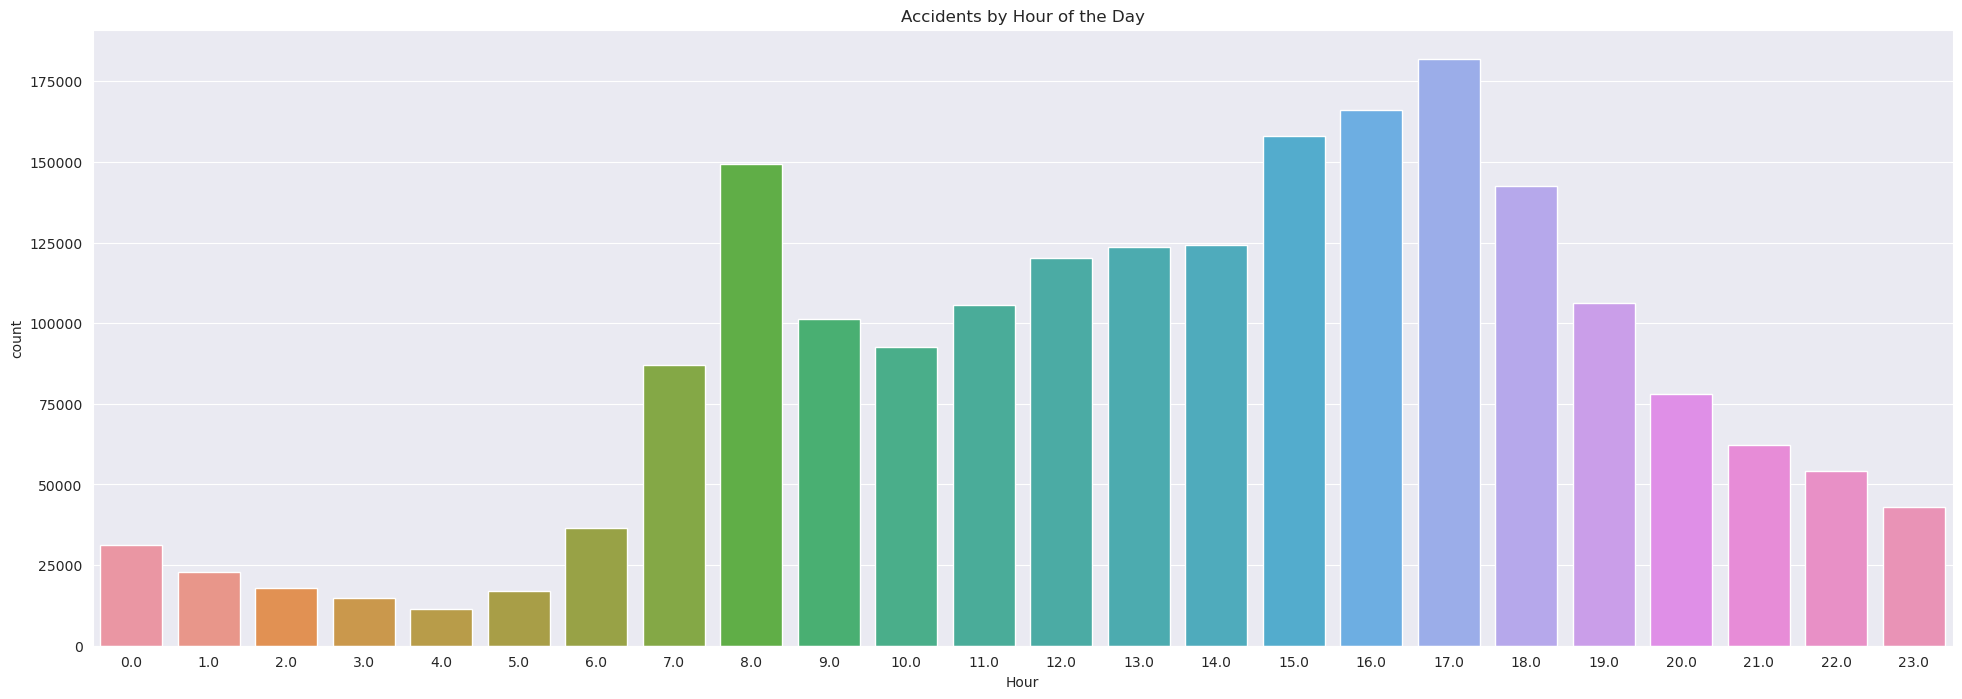

In [16]:
# Drill-down accidents to the hour of the day

plt.figure(figsize=(24, 8))
accidents['Time'] = pd.to_datetime(accidents['Time'], format="%H:%M")
accidents['Hour'] = accidents['Time'].dt.hour
sns.countplot(data=accidents, x='Hour')
plt.title("Accidents by Hour of the Day")
plt.show()

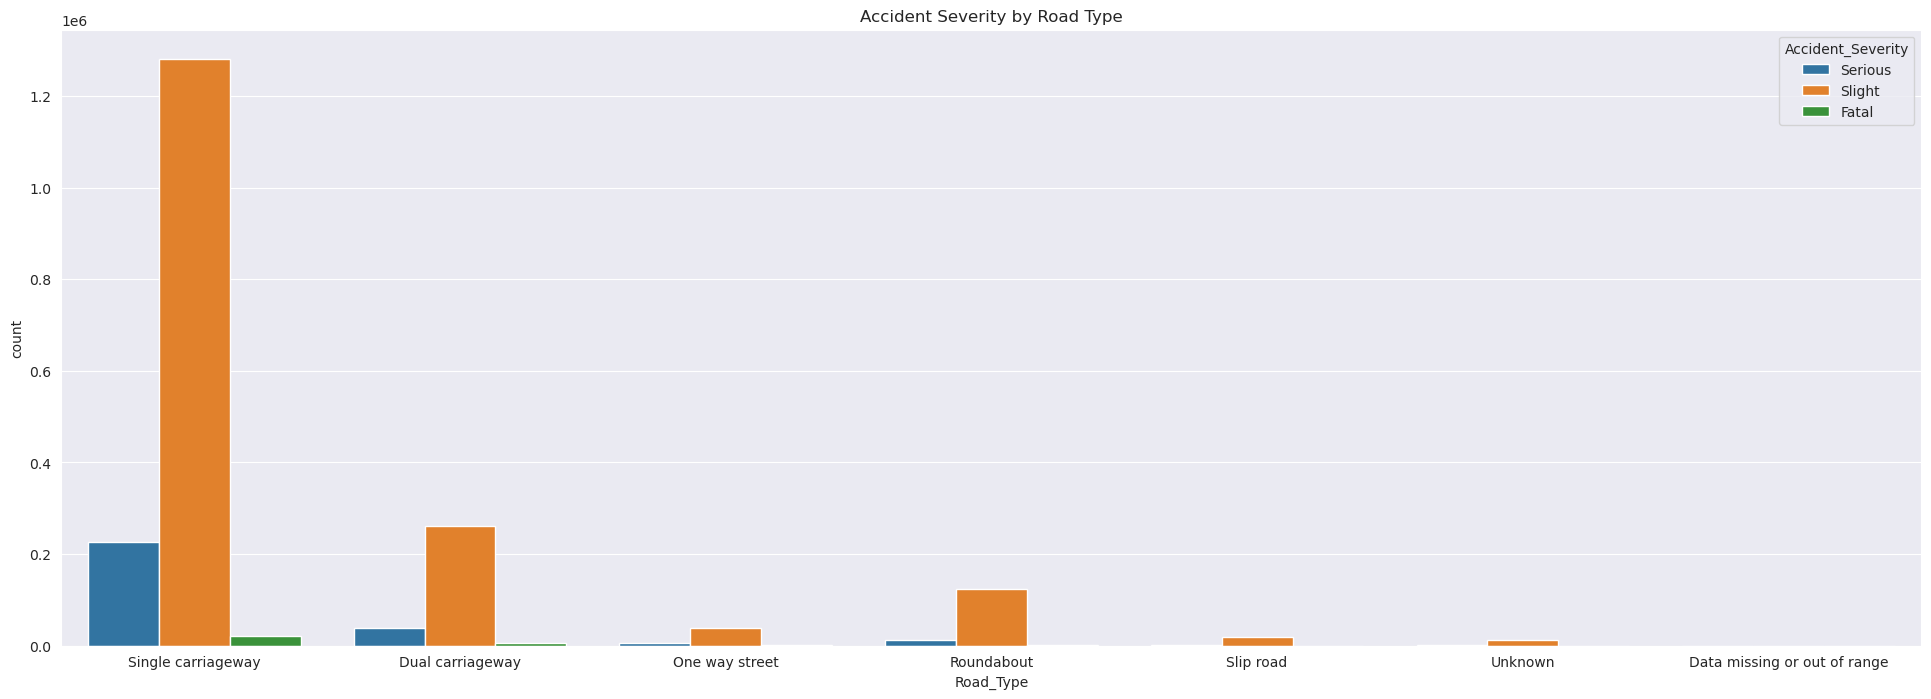

In [17]:
# Show Severity by road type

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Road_Type', hue='Accident_Severity')
plt.title("Accident Severity by Road Type")
plt.show()

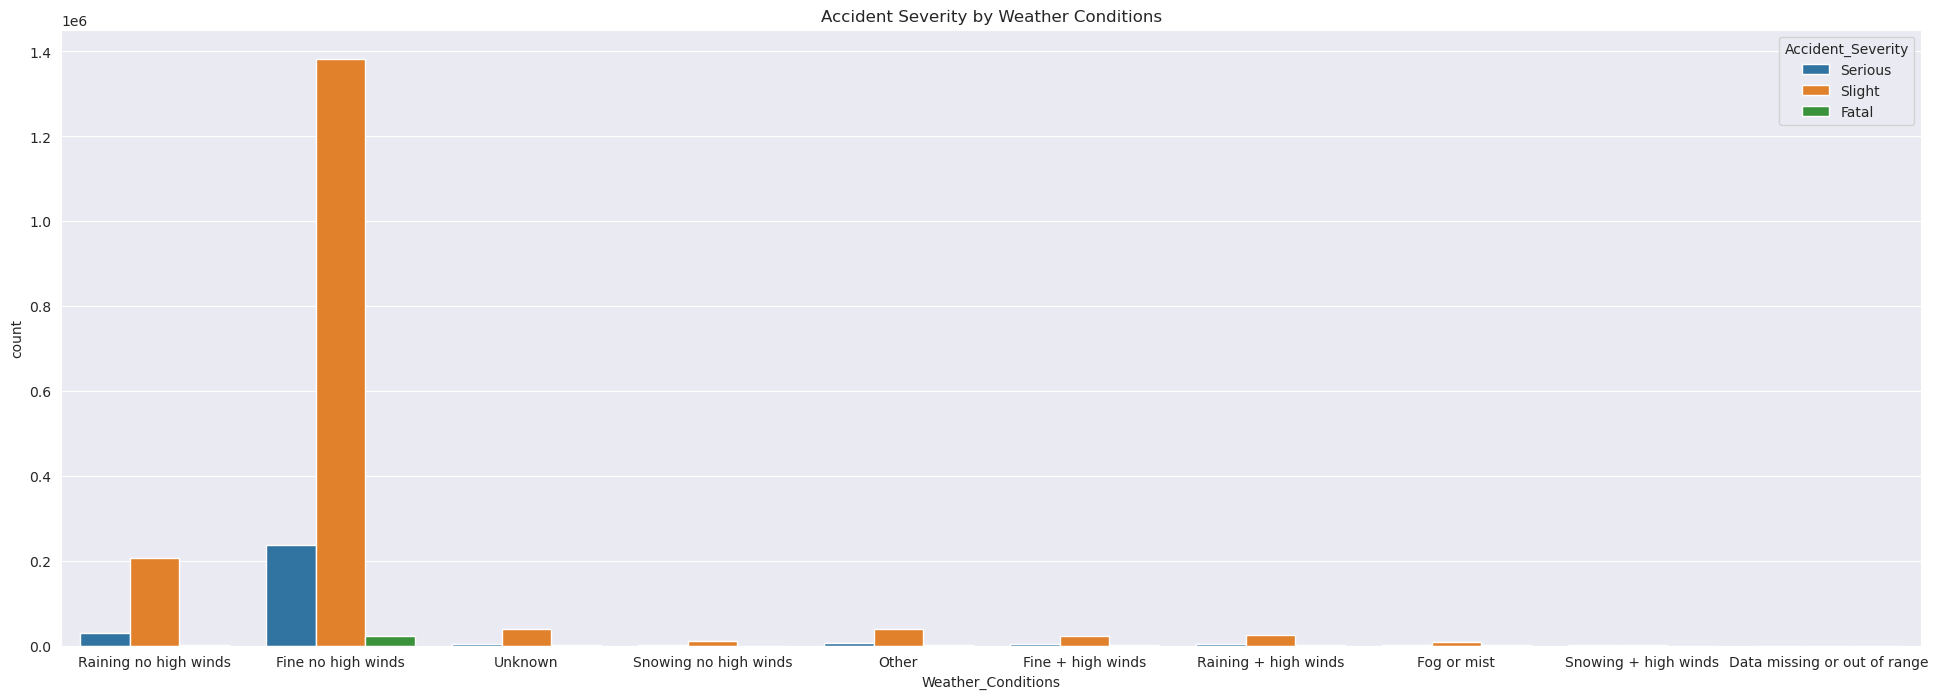

In [18]:
# Severity by weather

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Weather_Conditions', hue='Accident_Severity')
plt.title("Accident Severity by Weather Conditions")
plt.show()

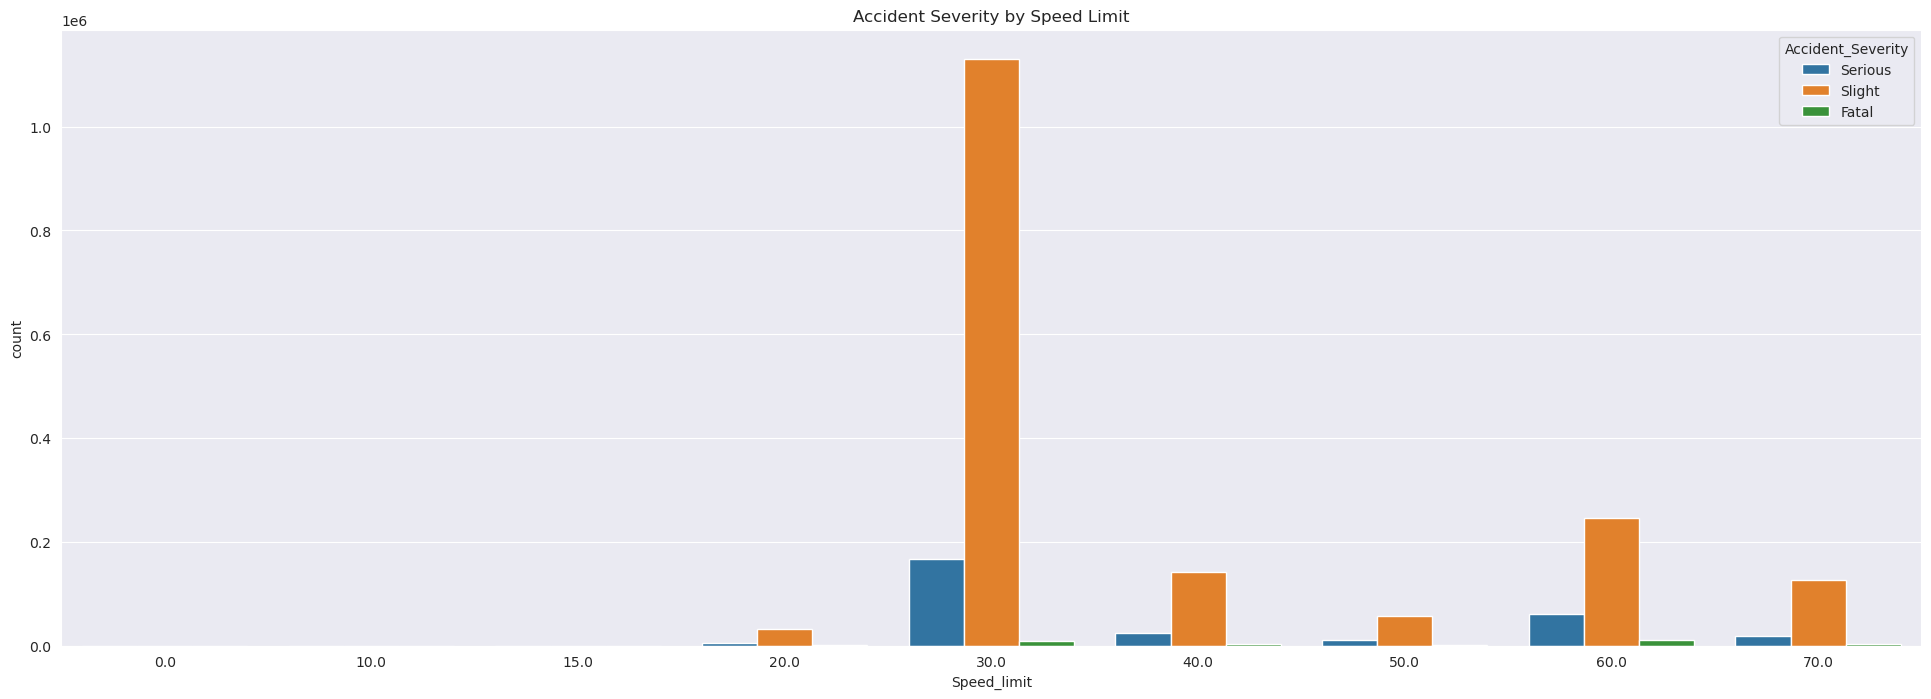

In [19]:
# Severity by speed limit

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Speed_limit', hue='Accident_Severity')
plt.title("Accident Severity by Speed Limit")
plt.show()

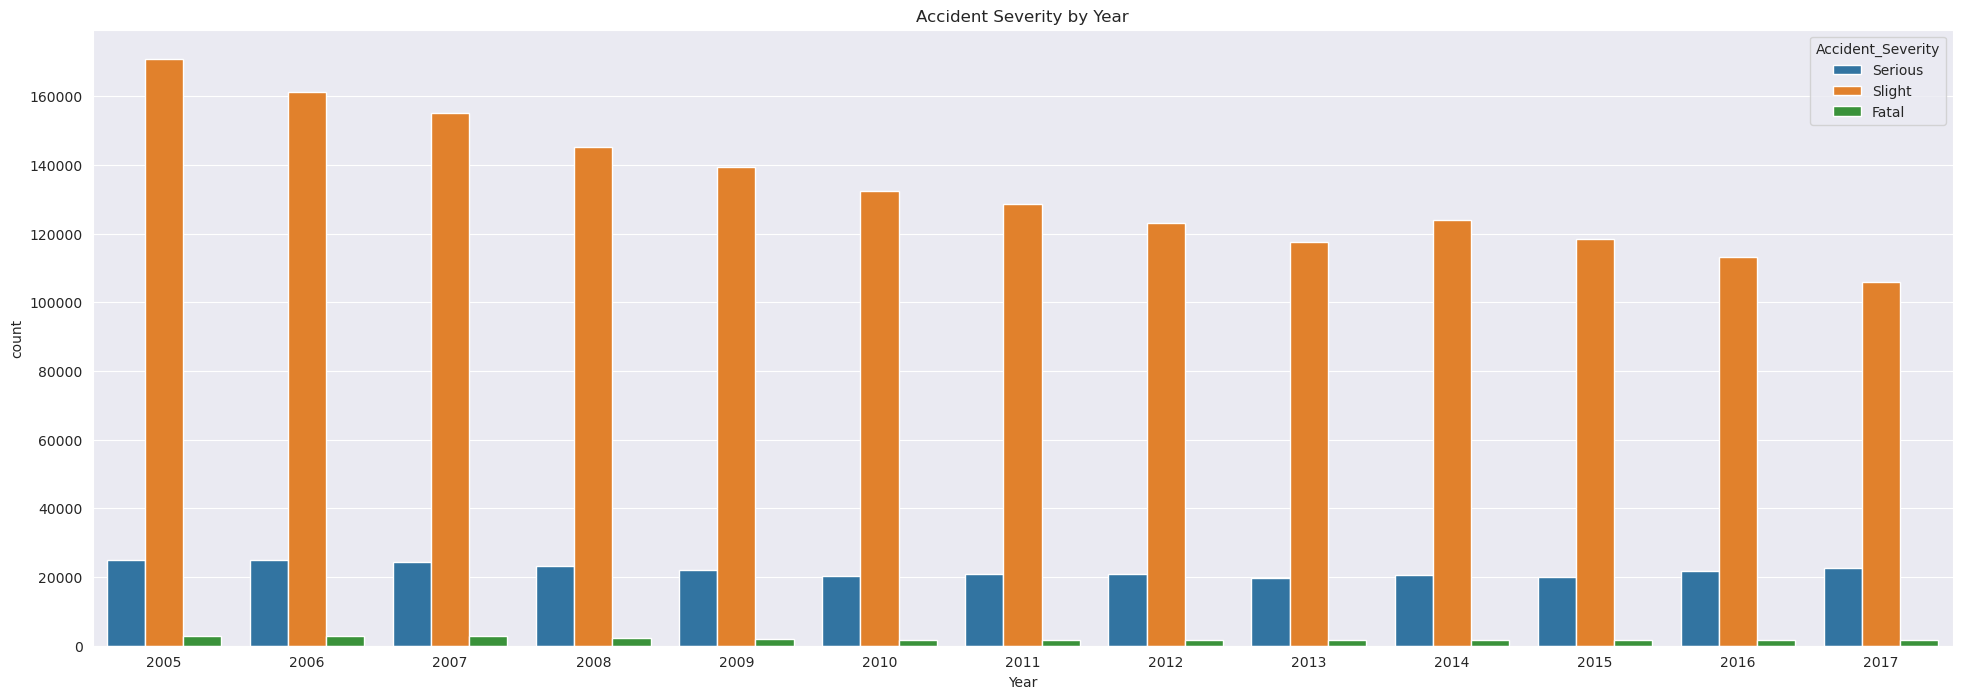

In [20]:
# Severity by year

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents, x='Year', hue='Accident_Severity')
plt.title("Accident Severity by Year")
plt.show()

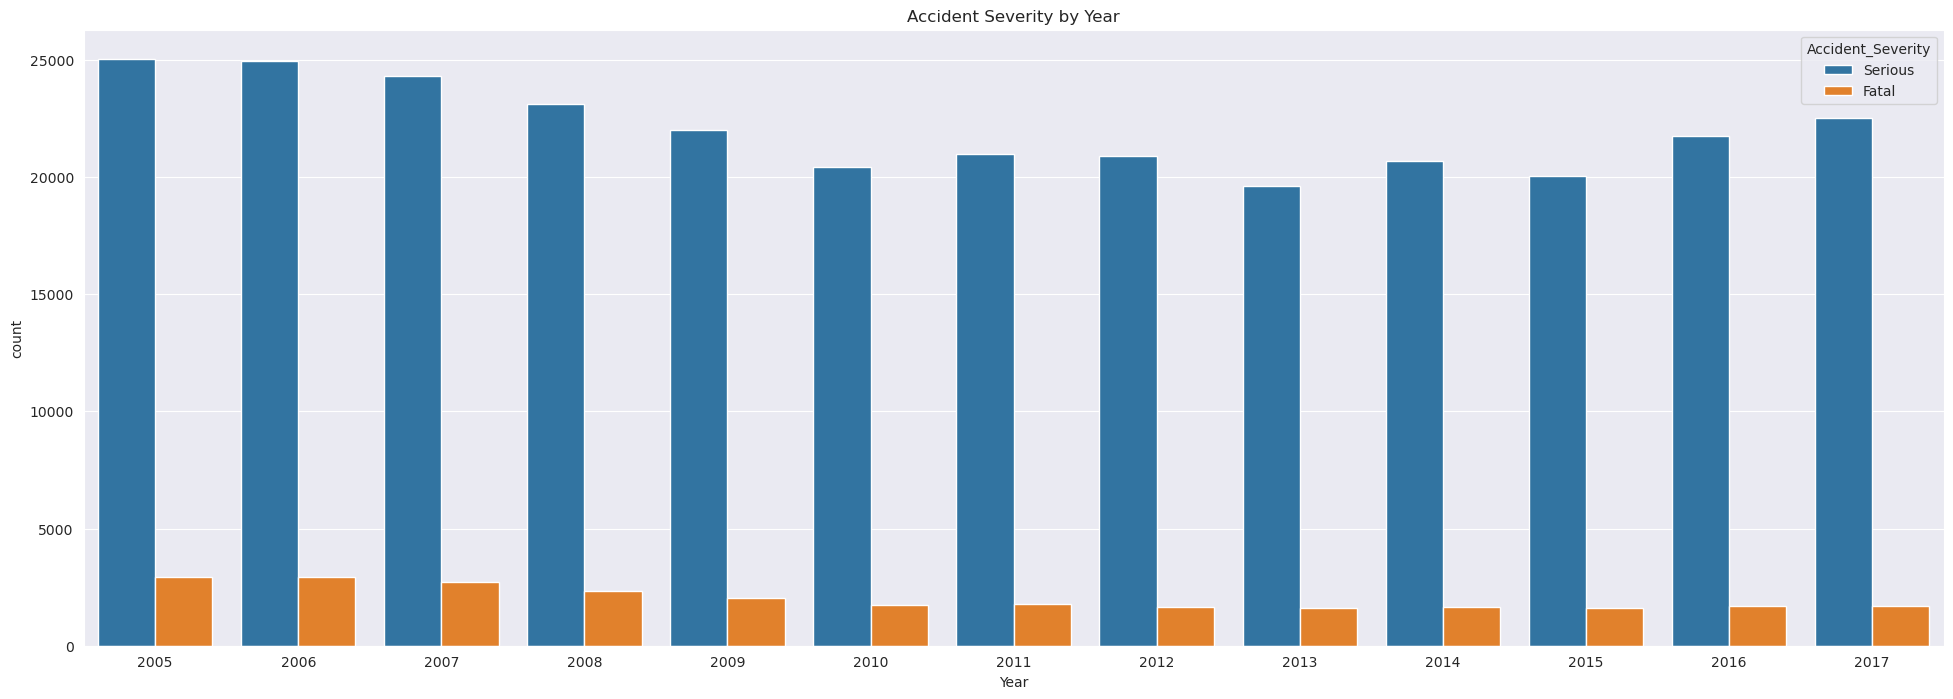

In [21]:
# Severity by year, excluding Slight

plt.figure(figsize=(24, 8))
sns.countplot(data=accidents.query("Accident_Severity != 'Slight'"), x='Year', hue='Accident_Severity')
plt.title("Accident Severity by Year")
plt.show()

A positive downward trend is visibile for Fatal, but not so much for Serious.

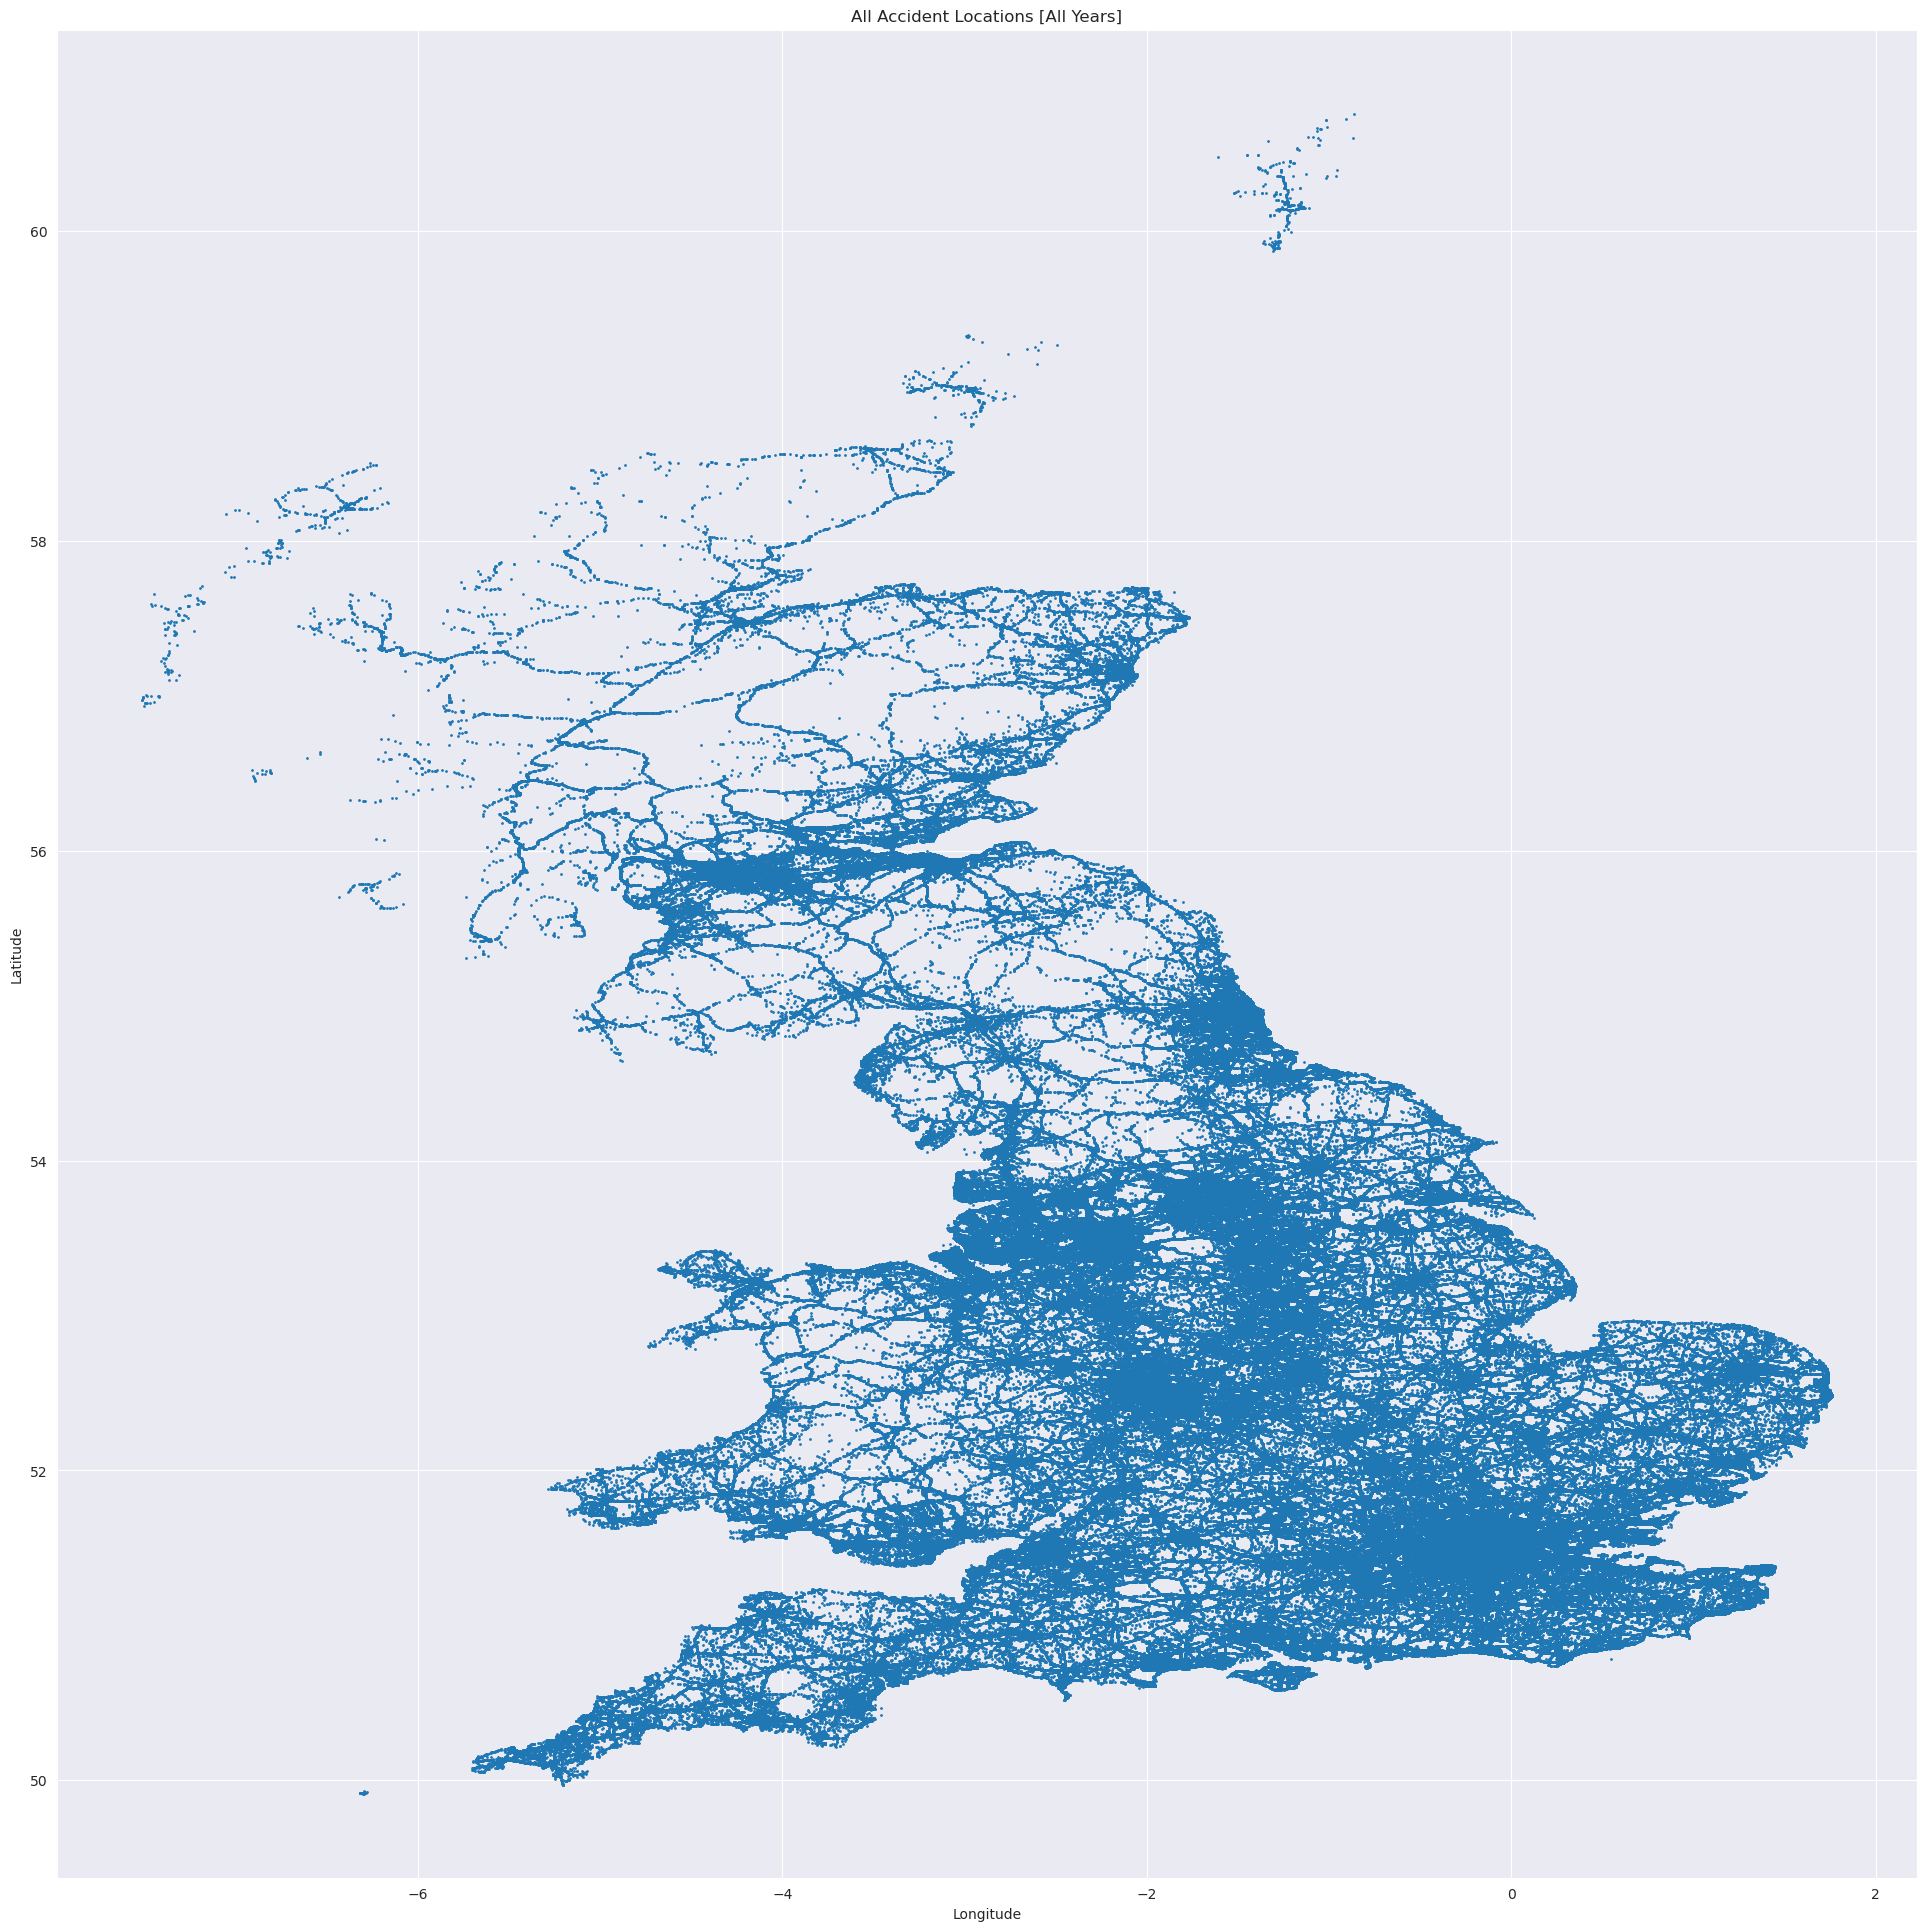

In [22]:
# Plot the coordinates of reported accidents

plt.figure(figsize=(24, 24))
plt.scatter(accidents.Longitude, accidents.Latitude, s=1)
plt.title("All Accident Locations [All Years]")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

By plotting all accidents for all years, the road networks start to become visible.

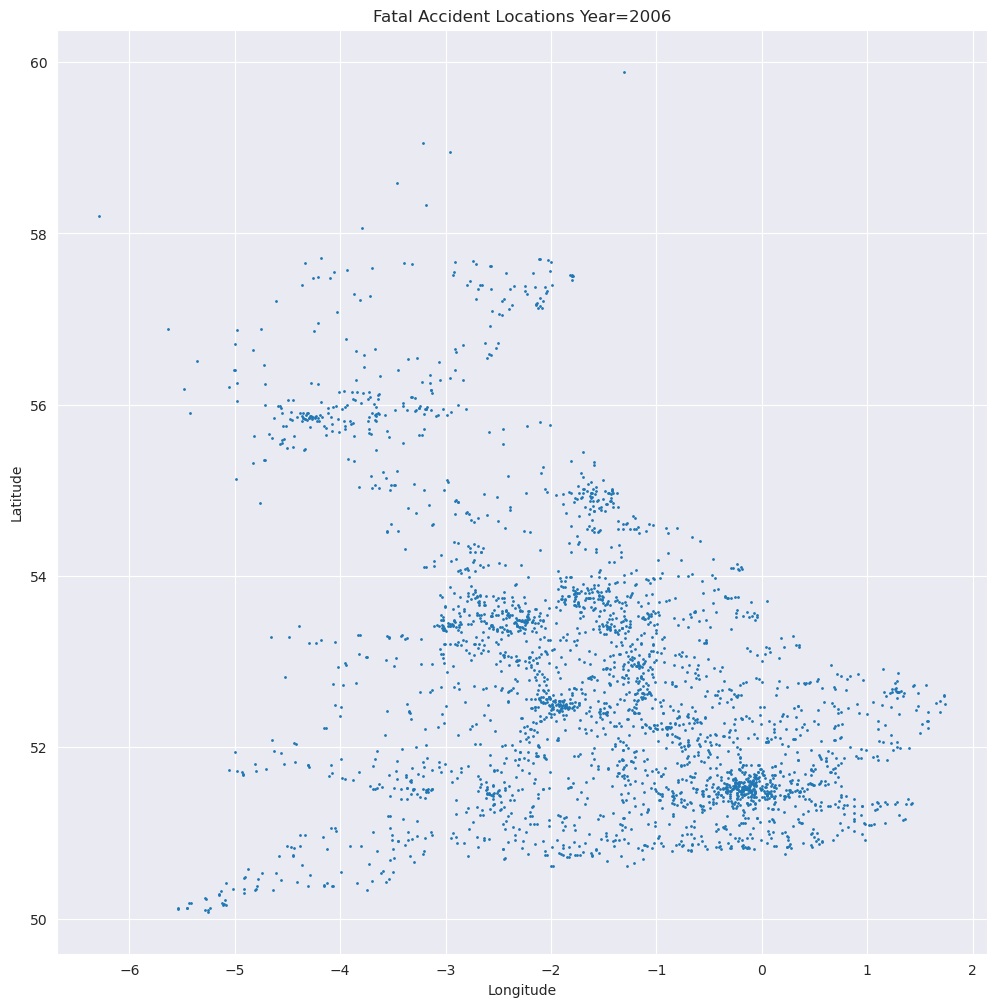

In [23]:
# Plot the coordinates of reported Fatal accidents, but for the year with one of the highest in the data.

plt.figure(figsize=(12, 12))
fatal_accidents = accidents.query("Accident_Severity == 'Fatal' and Year == 2006")

plt.scatter(fatal_accidents.Longitude, fatal_accidents.Latitude, s=1)
plt.title("Fatal Accident Locations Year=2006")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Filtering on one of the deadliest years in the dataset, the densely populated areas start to become visible.

In [24]:
accidents.columns

Index(['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Hour'],
      dtype='object')

## EDA: vehicles

In [25]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177205 entries, 200401BS00001 to 2016984133416
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Age_Band_of_Driver                object 
 1   Age_of_Vehicle                    float64
 2   Driver_Home_Area_Type             object 
 3   Driver_IMD_Decile                 float64
 4   Engine_Capacity_.CC.              float64
 5   Hit_Object_in_Carriageway         object 
 6   Hit_Object_off_Carriageway        object 
 7   Journey_Purpose_of_Driver         object 
 8   Junction_Location                 object 
 9   make                              object 
 10  model                             object 
 11  Propulsion_Code                   object 
 12  Sex_of_Driver                     object 
 13  Skidding_and_Overturning          object 
 14  Towing_and_Articulation           object 
 15  Vehicle_Leaving_Carriageway       object 
 16  Vehicle_Location.Restri

In [26]:
vehicles.sample(n=10)

,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
201306A080962,36 - 45,1.0,Urban area,4.0,NaN,None,None,Commuting to/from work,Cleared junction or waiting/parked at junction...,RENAULT,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning left,1,Car,No,Nearside,2013
2008600AN6005,26 - 35,17.0,Rural,NaN,NaN,None,None,Taking pupil to/from school,Not at or within 20 metres of junction,VOLVO,...,None,No tow/articulation,Did not leave carriageway,0.0,Parked,2,Bus or coach (17 or more pass seats),No,Back,2008
2015350099015,36 - 45,8.0,Urban area,NaN,3920.0,None,None,Journey as part of work,Not at or within 20 metres of junction,IVECO,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Goods 7.5 tonnes mgw and over,No,Front,2015
2016301600862,36 - 45,10.0,Urban area,4.0,1598.0,None,None,Taking pupil to/from school,Mid Junction - on roundabout or on main road,VAUXHALL,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016
201401JI40236,26 - 35,7.0,Urban area,1.0,1360.0,None,None,Not known,Not at or within 20 metres of junction,PEUGEOT,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Nearside,2014
201101KF60116,21 - 25,12.0,Urban area,2.0,1149.0,None,None,Not known,Not at or within 20 metres of junction,RENAULT,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Car,No,Front,2011
2009170L20309,46 - 55,8.0,Urban area,8.0,1686.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,VAUXHALL,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Front,2009
200601XD80689,Data missing or out of range,4.0,Data missing or out of range,NaN,7300.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,VOLVO,...,None,No tow/articulation,Did not leave carriageway,0.0,Changing lane to right,2,Bus or coach (17 or more pass seats),No,Did not impact,2006
2009460176407,66 - 75,2.0,Data missing or out of range,NaN,1364.0,None,None,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,VAUXHALL,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2009


In [27]:
# A glimpse of columns with less than 10 occurrences, see which ones could be categorical
vehicles.loc[:, vehicles.nunique() <= 50].apply(pd.Series.unique)

Age_Band_of_Driver                  [26 - 35, 66 - 75, 36 - 45, 46 - 55, 21 - 25, ...
Driver_Home_Area_Type               [Urban area, Data missing or out of range, Rur...
Driver_IMD_Decile                   [4.0, 3.0, nan, 8.0, 6.0, 10.0, 7.0, 5.0, 2.0,...
Hit_Object_in_Carriageway           [None, Parked vehicle, Kerb, Previous accident...
Hit_Object_off_Carriageway          [None, Other permanent object, Road sign or tr...
Journey_Purpose_of_Driver           [Data missing or out of range, Journey as part...
Junction_Location                   [Data missing or out of range, Leaving roundab...
Propulsion_Code                     [Petrol, nan, Heavy oil, Gas/Bi-fuel, Electric...
Sex_of_Driver                       [Male, Female, Not known, Data missing or out ...
Skidding_and_Overturning            [None, Skidded, Skidded and overturned, Overtu...
Towing_and_Articulation             [No tow/articulation, Articulated vehicle, Sin...
Vehicle_Leaving_Carriageway         [Did not leave car

In [28]:
# The count and percentage of NaN values in columns that have more than 0 NaN values
nan_count = vehicles.loc[:, vehicles.isna().sum() > 0].isna().sum().sort_values()
nan_percent = round(nan_count / len(vehicles) * 100, 2)
nan_summary = pd.concat([nan_count, nan_percent], axis=1)
nan_summary.columns = ['NaN Count', 'NaN Percentage']
nan_summary

,NaN Count,NaN Percentage
Vehicle_Location.Restricted_Lane,1317,0.06
make,110845,5.09
Propulsion_Code,245843,11.29
Engine_Capacity_.CC.,265861,12.21
model,325331,14.94
Age_of_Vehicle,358149,16.45
Driver_IMD_Decile,734812,33.75


## EDA: Merged Datasets

In [29]:
# Merge

print(f'accidents: {accidents.values.shape[0]} rows and {accidents.values.shape[1]} columns')
merged = accidents.merge(vehicles, on='Accident_Index')
print(f'merged vehicles: {merged.values.shape[0]} rows and {merged.values.shape[1]} columns')
merged.sample(n=10)

accidents: 2047256 rows and 34 columns
merged vehicles: 2058408 rows and 57 columns


,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200901TW60060,A,307.0,B,352.0,Slight,None,2009-02-04,Wednesday,1.0,Give way or uncontrolled,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Front,2009
2014214002865,A,5007.0,Unclassified,0.0,Slight,None,2014-05-27,Tuesday,1.0,Give way or uncontrolled,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,Car,No,Nearside,2014
2016076132568,A,537.0,NaN,0.0,Slight,None,2016-05-07,Saturday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Parked,3,Car,No,Did not impact,2016
201322C304643,A,4133.0,Unclassified,0.0,Slight,None,2013-12-12,Thursday,1.0,Give way or uncontrolled,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2013
2011921101005,A,956.0,NaN,0.0,Slight,None,2011-03-10,Thursday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Taxi/Private hire car,No,Front,2011
201214A190112,C,22.0,NaN,0.0,Slight,None,2012-12-31,Monday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,3,Goods over 3.5t. and under 7.5t,No,Did not impact,2012
201134TM01861,Motorway,1.0,Motorway,1.0,Serious,None,2011-01-14,Friday,1.0,Give way or uncontrolled,...,None,Single trailer,Nearside,0.0,Going ahead other,1,Van / Goods 3.5 tonnes mgw or under,No,Front,2011
201442I176705,A,1060.0,NaN,0.0,Slight,None,2014-05-31,Saturday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Car,No,Nearside,2014
2011130302038,Unclassified,0.0,Unclassified,0.0,Slight,None,2011-07-02,Saturday,1.0,Give way or uncontrolled,...,None,No tow/articulation,Straight ahead at junction,0.0,Going ahead other,2,Motorcycle 125cc and under,No,Offside,2011


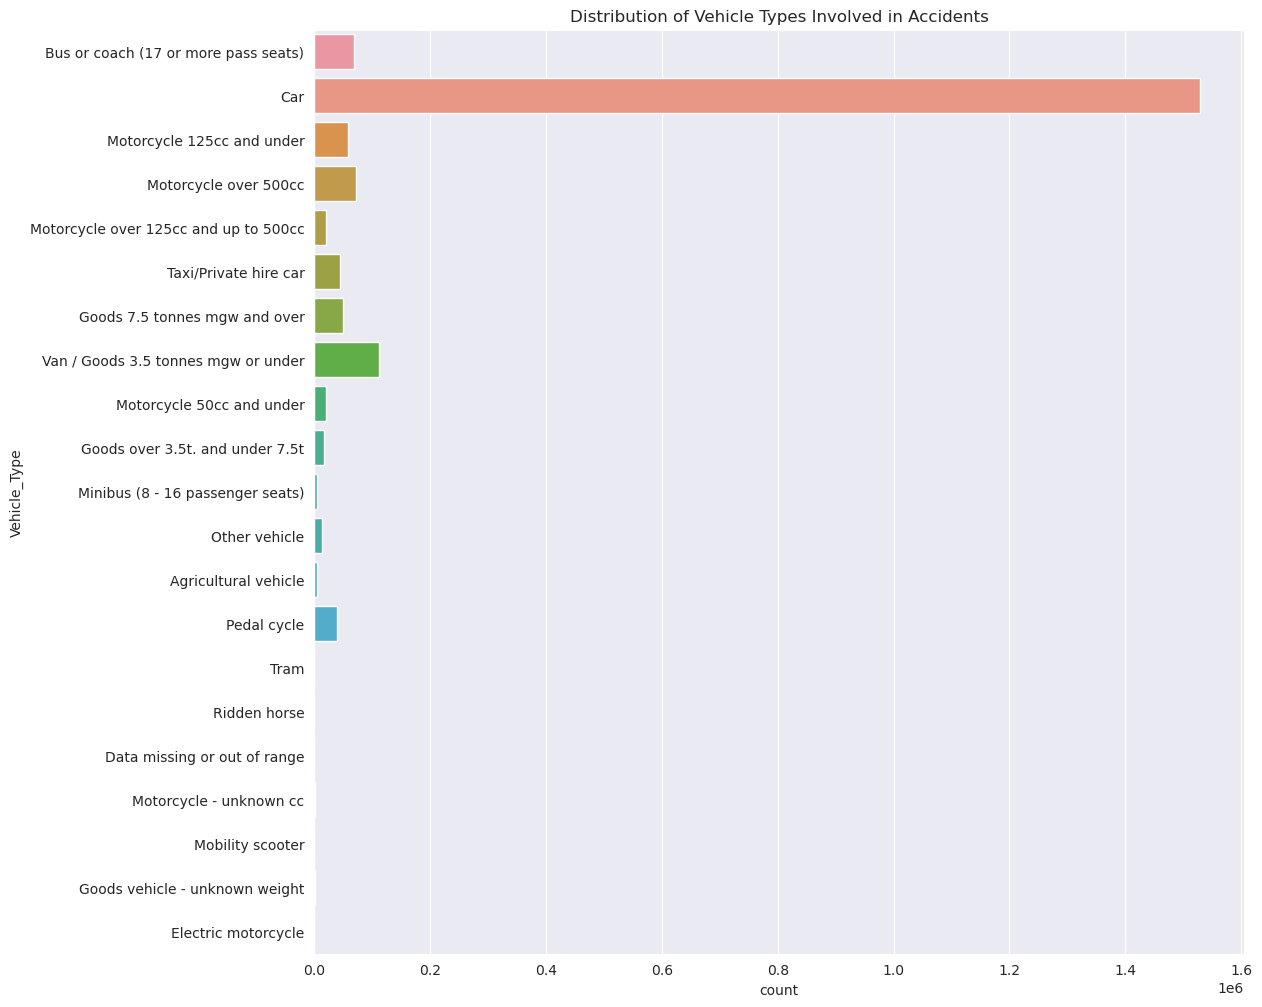

In [30]:
# Visualise the distribution of vehicle types involved in accidents
plt.figure(figsize=(12, 12))
ax = sns.countplot(y='Vehicle_Type', data=merged)
ax.set_title('Distribution of Vehicle Types Involved in Accidents')
plt.show()

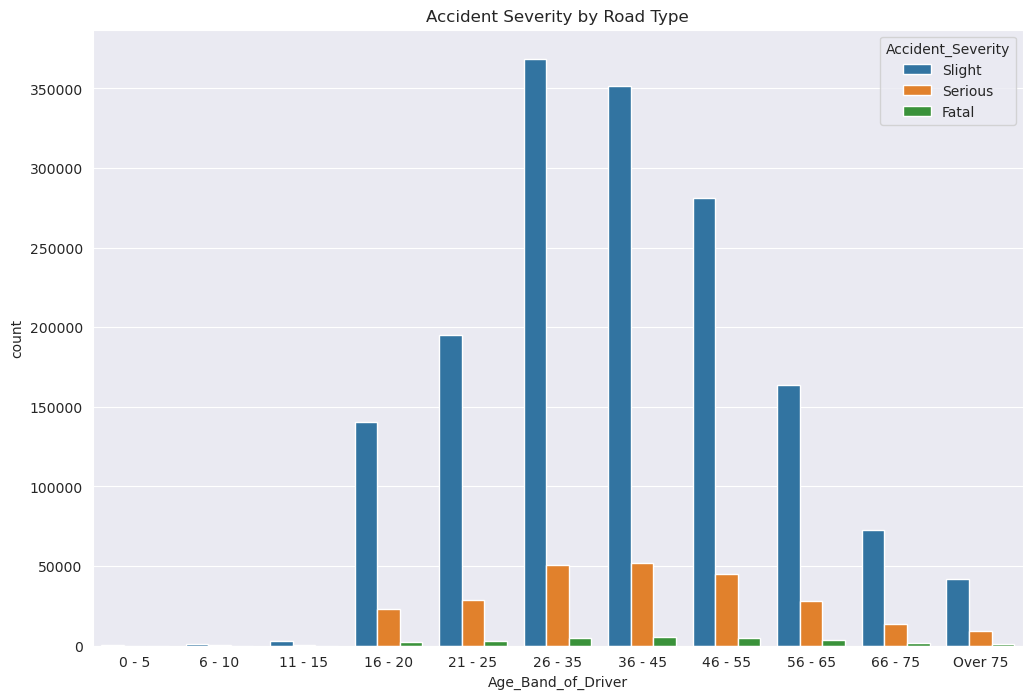

In [31]:
# Show Severity by road type
age_order = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']
plt.figure(figsize=(12, 8))
sns.countplot(data=merged, x='Age_Band_of_Driver', hue='Accident_Severity', order=age_order)
plt.title("Accident Severity by Road Type")
#plt.savefig('Accidents_by_Time_of_Day_bar.png', bbox_inches='tight')
plt.show()


# Data Pre-Processing

In [32]:
print(f'Schema[merged.Date]: {merged.Date.dtype}')

Schema[merged.Date]: object


In [33]:
merged.Date = pd.to_datetime(merged.Date, format="%Y-%m-%d")
print(f'Schema[merged.Date]: {merged.Date.dtype}')

Schema[merged.Date]: datetime64[ns]


## Data Cleaning

Drop data for before 2005 and after 2017 as that is outside the study period.

In [34]:
merged = merged.drop(merged[merged.Year_x < 2005].index)
merged = merged.drop(merged[merged.Year_x > 2017].index)
len(merged)

2058408

## Handling Missing Values

**Did_Police_Officer_Attend_Scene_of_Accident** - Fill with mode. Note that one could argue that this column has little use and should be dropped.

In [35]:
merged['Did_Police_Officer_Attend_Scene_of_Accident'] = merged['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(merged['Did_Police_Officer_Attend_Scene_of_Accident'].mode().iloc[0])

**"Latitude", "Longitude"** - Unfortunately Northing and Easting is also missing for same rows. Otherwise, we could convert from British National Grid to EPSG:4326. A sensible approach would be to look at the local area. Perhaps the most common latitude from the local area. LSOA is also missing for the same rows so instead look at the broader Local_Authority_District.

In [36]:
merged['Longitude'] = merged.groupby(
    ['Local_Authority_(District)']
).Longitude.apply(
    lambda x: x.fillna(x.mode()[0])
)

merged['Latitude'] = merged.groupby(
    ['Local_Authority_(District)']
).Latitude.apply(
    lambda x: x.fillna(x.mode()[0])
)

**Using KNN with coordinates to populate *local* missing data**
There are quite a few columns which can use coordinate NN data to impute missing data.

We use sklearn.neighbours.**BallTree** to create the nn structure based on latitude and longitude of all data.


In [37]:
#Create a neighbour BallTree using only the Latitude and Longitude columns
#This can then be used to query nearby rows.

from sklearn.neighbors import BallTree
nntree = BallTree(merged[['Latitude','Longitude']])

**Illustration of neighbour.BallTree**
Find the k nearest neighbours from a single row using latitude and longitude.

The first will be the row itself.

The axes are in decimal degrees. Noting that 0.001 decimal degrees is approx equal to 111 meters, we can see that the locations are very close together and the BallTree has indeed found the nearest neighbours.

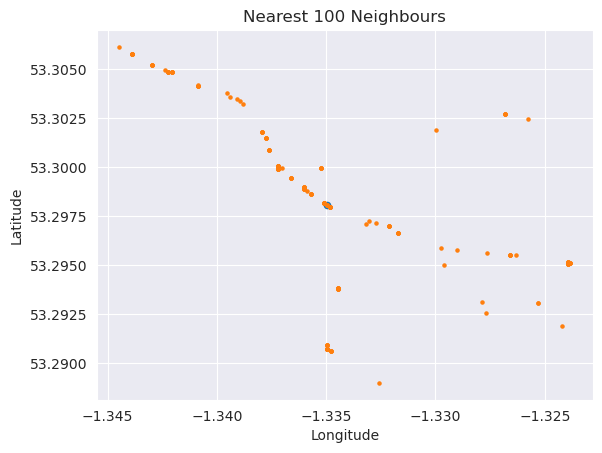

In [38]:
#choose a single row at random
row = merged.sample(random_state=random_state)
dist, ind = nntree.query(row[['Latitude','Longitude']], k=100)
nn_ind = ind[0]
nearest = merged.loc[merged.index[nn_ind]]

plt.scatter(row.Longitude, row.Latitude, s=20)
plt.scatter(nearest.Longitude, nearest.Latitude, s=5)
plt.title("Nearest 100 Neighbours")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('Figure_BallTree.png', bbox_inches='tight')
plt.show()

"**LSOA_of_Accident_Location**" - use the nntree to populate missing LSOA. Scotland rows do not seem to have this populated - populate these with "Scotland"

In [39]:
#First just set the (missing by design) Scotland values
merged.loc[(merged.InScotland== 'Yes') & (merged.LSOA_of_Accident_Location.isna()), 'LSOA_of_Accident_Location'] = 'Scotland'

#For the rest of the values, we could use latitude/longitude. Find the nearest other row and use that LSOA.

data_missing_lsoa = merged.loc[merged['LSOA_of_Accident_Location'].isnull()]
print("Num missing: ", len(data_missing_lsoa))
merged.loc[merged.LSOA_of_Accident_Location.isna(), 'LSOA_of_Accident_Location'] = ''
dist, ind = nntree.query(data_missing_lsoa[['Latitude','Longitude']], k=3)

j=0
for i,row in data_missing_lsoa.iterrows():
    three_ind = ind[j]
    for idx in three_ind:
        lsoa = merged.iloc[idx].LSOA_of_Accident_Location
        if len(lsoa) > 0:
            merged.at[i,'LSOA_of_Accident_Location'] = lsoa
            break
    j = j+1

Num missing:  8920


**1st_Road_Number** - There is only 1 missing value. Impute from NN using latitude/longitude. We can re-use the BallTree

In [40]:
data_missing_road_num = merged.loc[merged['1st_Road_Number'].isnull()]
print(len(data_missing_road_num))
dist, ind = nntree.query(data_missing_road_num[['Latitude','Longitude']], k=3)

import math
j = 0
for i,row in data_missing_road_num.iterrows():
    three_ind = ind[j]
    for idx in three_ind:
        row = merged.iloc[idx]
        road = row['1st_Road_Number']
        print("Road = ", road)
        if math.isnan(road) == False:
            print("Set road to ", road)
            merged.at[i,'1st_Road_Number'] = road
            break
    j = j+1


1
Road =  nan
Road =  0.0
Set road to  0.0


**Pedestrian_Crossing-Physical_Facilities** - I think NN is again appropriate here. Because there is abundant data, there is a significant chance that the NN will actually be the same pedestrian crossing.

In [41]:
len(merged)

2058408

In [42]:
data_missing_pedestrian = merged.loc[merged['Pedestrian_Crossing-Physical_Facilities'].isnull()]
print(len(data_missing_pedestrian))
dist, ind = nntree.query(data_missing_pedestrian[['Latitude','Longitude']], k=8)

j = 0
for i,row in data_missing_pedestrian.iterrows():
    three_ind = ind[j]
    for idx in three_ind:
        row = merged.iloc[idx]
        pedestrian_x = row['Pedestrian_Crossing-Physical_Facilities']
        if math.isnan(pedestrian_x) == False:
            merged.at[i,'Pedestrian_Crossing-Physical_Facilities'] = pedestrian_x
            break
    j = j+1


1370


**Speed_limit** - There are only 65 missing vals. It seems sensible to again find the nearest using latitude and longitude and impute from the nearest valid neighbour.

In [43]:
data_missing_speed = merged.loc[merged['Speed_limit'].isnull()]
print(len(data_missing_speed))
dist, ind = nntree.query(data_missing_speed[['Latitude','Longitude']], k=4)

j = 0
for i,row in data_missing_speed.iterrows():
    three_ind = ind[j]
    for idx in three_ind:
        speed = merged.iloc[idx].Speed_limit
        if math.isnan(speed) == False:
            merged.at[i,'Speed_limit'] = speed
            break
    j = j+1

65


**InScotland** there are only 44 - Use lat/lon nn to get nearest and impute from that.

In [44]:
data_missing_inscotland = merged.loc[merged['InScotland'].isnull()]
print(len(data_missing_inscotland))
merged.loc[merged.InScotland.isna(), 'InScotland'] = ''
dist, ind = nntree.query(data_missing_inscotland[['Latitude','Longitude']], k=3)

j = 0
for i,row in data_missing_inscotland.iterrows():
    three_ind = ind[j]
    for idx in three_ind:
        inscotland = merged.iloc[idx].InScotland
        if len(inscotland) > 0 == False:
            merged.at[i,'InScotland'] = inscotland
            break
    j = j+1

44


**Pedestrian_Crossing-Human_Control** - I think we can safely fill the missing with the mode value which is 0.

In [45]:
print(merged['Pedestrian_Crossing-Human_Control'].value_counts())
merged['Pedestrian_Crossing-Human_Control'].fillna(0, inplace=True)

0.0    2046659
2.0       6875
1.0       4220
Name: Pedestrian_Crossing-Human_Control, dtype: int64


In [46]:
merged[merged['Vehicle_Type'].isnull()]

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,


In [47]:
merged.shape[0]

2058408

**Make** - approx 110k missing. All we have is the Vechicle_Type. Set to mode of make within the Vehicle_Type

In [48]:
unique_vehicle_type = merged['Vehicle_Type'].unique()
for vt in unique_vehicle_type:
    mode = merged.loc[(merged.Vehicle_Type == vt), 'make'].mode()[0]
    merged.loc[(merged.Vehicle_Type == vt) & (merged.model.isnull()), 'make'] = mode
    print(vt, "   Set 'make' to ", mode)

Bus or coach (17 or more pass seats)    Set 'make' to  VOLVO
Car    Set 'make' to  VAUXHALL
Motorcycle 125cc and under    Set 'make' to  HONDA
Motorcycle over 500cc    Set 'make' to  HONDA
Motorcycle over 125cc and up to 500cc    Set 'make' to  HONDA
Taxi/Private hire car    Set 'make' to  LONDON TAXIS INT
Goods 7.5 tonnes mgw and over    Set 'make' to  VOLVO
Van / Goods 3.5 tonnes mgw or under    Set 'make' to  FORD
Motorcycle 50cc and under    Set 'make' to  PIAGGIO
Goods over 3.5t. and under 7.5t    Set 'make' to  MERCEDES
Minibus (8 - 16 passenger seats)    Set 'make' to  FORD
Other vehicle    Set 'make' to  FORD
Agricultural vehicle    Set 'make' to  JOHN DEERE
Pedal cycle    Set 'make' to  MERCEDES
Tram    Set 'make' to  FORD
Ridden horse    Set 'make' to  CITROEN
Data missing or out of range    Set 'make' to  FORD
Motorcycle - unknown cc    Set 'make' to  HONDA
Mobility scooter    Set 'make' to  FORD
Goods vehicle - unknown weight    Set 'make' to  DAF TRUCKS
Electric motorcycle

**Model** most empties are empty by design - generally not populated for large vehicles and motorbikes. First set to the mode within the subgroup of 'make' and vehicle_type. That will at least populate for the most important type- 'car','van' etc

In [49]:
# lazy grouping
groups_by_type_make = merged.groupby(['Vehicle_Type', 'make'])
# where all the rows within a group is NaN
all_na = groups_by_type_make['model'].transform(lambda x: x.isna().all())

# fill global mode
merged.loc[all_na, 'model'] = merged['model'].mode()[0]

# fill with local mode
mode_by_group = groups_by_type_make['model'].transform(lambda x: x.mode()[0])
merged['model'] = merged['model'].fillna(mode_by_group)

**Engine_Capacity** There are a lot of nan values.

Idea is to impute based on make, model, vehicle_type.

Get engine capacity based on make model (where available)

For the rest, I can't think of anything better than simply the mode across all data.

In [50]:
# lazy grouping
groups_by_model = merged.groupby('model')
# where all the rows within a group is NaN
all_na = groups_by_model['Engine_Capacity_.CC.'].transform(lambda x: x.isna().all())

# fill global mode
merged.loc[all_na, 'Engine_Capacity_.CC.'] = merged['Engine_Capacity_.CC.'].mode()[0]

# fill with local mode
mode_by_group = groups_by_model['Engine_Capacity_.CC.'].transform(lambda x: x.mode()[0])
merged['Engine_Capacity_.CC.'] = merged['Engine_Capacity_.CC.'].fillna(mode_by_group)

**Age_of_Vehicle** relatively low number of missing. I think we can reliably use model

In [51]:
# where all the rows within a group is NaN
all_na = groups_by_model['Age_of_Vehicle'].transform(lambda x: x.isna().all())

# fill global mode
merged.loc[all_na, 'Age_of_Vehicle'] = merged['Age_of_Vehicle'].mean()

# fill with local mode
mean_by_group = groups_by_model['Age_of_Vehicle'].transform(lambda x: x.mean())
merged['Age_of_Vehicle'] = merged['Age_of_Vehicle'].fillna(mean_by_group.round(0))

**Time** There is a small enough na size that we can safely use the mode

In [52]:
merged['Time'].fillna(merged.Time.mode()[0], inplace=True)

**2nd_Road_Class** Thee is a such a high percentage of missing, it seems that dropping the columns is the best course of action

In [53]:
merged.drop(columns='2nd_Road_Class', inplace=True)

**Driver_IMD_Decile** Again, there is a very high percentage of missing. Drop the column

In [54]:
merged.drop(columns='Driver_IMD_Decile', inplace=True)

**Propulsion_Code** - there are only a very small number of unique values and it seems to me that the information is better contained within Vehicle_Type

In [55]:
merged.drop(columns='Propulsion_Code', inplace=True)

**2nd_Road_Number** - set these to 'NA' - which probably means that the accident happened nowhere near a second road.

In [56]:
merged['2nd_Road_Number'].fillna('NA', inplace=True)

**Vehicle_Location.Restricted_Lane**

In [57]:
merged['Vehicle_Location.Restricted_Lane'].fillna(merged['Vehicle_Location.Restricted_Lane'].mode()[0], inplace=True)

In [58]:
merged

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,B,450.0,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00003,C,0.0,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00004,A,3220.0,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
200501BS00005,Unclassified,0.0,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
200501BS00006,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,B,7020.0,49.0,Slight,None,2016-11-01,Tuesday,1.0,Give way or uncontrolled,Crossroads,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016
2016984131116,B,7020.0,49.0,Slight,None,2016-11-01,Tuesday,1.0,Give way or uncontrolled,Crossroads,...,None,No tow/articulation,Offside,0.0,Going ahead other,2,Car,No,Front,2016
2016984131216,A(M),74.0,0.0,Slight,None,2016-10-27,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,None,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1,Goods 7.5 tonnes mgw and over,No,Offside,2016


In [59]:
merged.drop(columns='Location_Easting_OSGR', inplace=True) # No longer needed, Lat/Long was used to fill in missing values
merged.drop(columns='Location_Northing_OSGR', inplace=True) # No longer needed, Lat/Long was used to fill in missing values
merged.drop(columns='Did_Police_Officer_Attend_Scene_of_Accident', inplace=True)
merged.drop(columns='Latitude', inplace=True) # No longer needed, missing values sorted.
merged.drop(columns='Longitude', inplace=True) # No longer needed, missing values sorted.
merged.drop(columns='Local_Authority_(District)', inplace=True) # No longer needed, Lat/Long was used to fill in missing values
merged.drop(columns='Local_Authority_(Highway)', inplace=True) # No longer needed, Lat/Long was used to fill in missing values
#merged.drop(columns='Police_Force(Highway)', inplace=True) # No longer needed, Lat/Long was used to fill in missing values
merged.drop(columns='LSOA_of_Accident_Location', inplace=True) # Not needed, provides no forecasting abilities.
merged.drop(columns='Year_x', inplace=True) # No longer needed, missing values sorted.
merged.drop(columns='Year_y', inplace=True) # No longer needed, missing values sorted.
merged.drop(columns='Time', inplace=True) # No longer needed, will use Date and Hour columns
merged.drop(columns='Vehicle_Reference', inplace=True) # Not needed, provides no forecasting abilities.
merged.drop(columns='Police_Force', inplace=True) # Not needed, provides no forecasting abilities.
merged.drop(columns='1st_Road_Number', inplace=True) # Related to 1st_Road_Class.  Not needed, provides no forecasting abilities.
merged.drop(columns='2nd_Road_Number', inplace=True) # Not needed, provides no forecasting abilities.
merged.drop(columns='Urban_or_Rural_Area', inplace=True) # Overlapping information with Driver_Home_Area_Type.
merged.drop(columns='InScotland', inplace=True) # We are not doing any analysis within any of the constituent countries in Britain
merged.drop(columns='Number_of_Casualties', inplace=True) # We are looking for either Serious/Fatal or not, casualties greater than 0 will mean Serious/Fatal also > 0.



In [60]:
merged

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,...,model,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,B,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,1,0.0,...,MISSING,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,Bus or coach (17 or more pass seats),No,Nearside
200501BS00003,C,Slight,None,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,2,0.0,...,MISSING,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,Bus or coach (17 or more pass seats),No,Nearside
200501BS00004,A,Slight,None,2005-01-07,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,1,0.0,...,ALMERA SE AUTO,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,Car,No,Front
200501BS00005,Unclassified,Slight,None,2005-01-10,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,1,0.0,...,SES 125-4,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,Motorcycle 125cc and under,No,Front
200501BS00006,Unclassified,Slight,None,2005-01-11,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,2,0.0,...,A4 SPORT CABRIOLET AUTO,Male,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,Car,No,Did not impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,B,Slight,None,2016-11-01,Tuesday,Give way or uncontrolled,Crossroads,Daylight,2,0.0,...,MINI COOPER,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,Car,No,Front
2016984131116,B,Slight,None,2016-11-01,Tuesday,Give way or uncontrolled,Crossroads,Daylight,2,0.0,...,ASTRA ENERGY CDTI,Female,None,No tow/articulation,Offside,0.0,Going ahead other,Car,No,Front
2016984131216,A(M),Slight,None,2016-10-27,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - no lighting,1,0.0,...,MISSING,Male,None,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,Goods 7.5 tonnes mgw and over,No,Offside


In [61]:
calculate_nan_count_percentage(merged)

,NaN Count,NaN Percentage
Hour,146,0.01


# Data Transformation

In [62]:
merged_pre_transformation = merged.copy()

Convert the target to either serious-fatal or not serious-fatal

### Accident_Severity

In [63]:
merged.Accident_Severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [64]:
Ycopy = merged[['Accident_Severity']].copy()
Ycopy['Serious_Fatal'] = Ycopy.Accident_Severity.apply(lambda x: 1 if x in ['Serious', 'Fatal'] else 0)
Ycopy.drop_duplicates()

,Accident_Severity,Serious_Fatal
Accident_Index,,
200501BS00002,Slight,0
200501BS00022,Serious,1
200501CP00085,Fatal,1


In [65]:
# Apply binary outcome
merged.Accident_Severity = merged.Accident_Severity.apply(lambda x: 1 if x in ['Serious', 'Fatal'] else 0)

### Engine_Capacity (CC)

In [66]:
merged.rename(columns={'Engine_Capacity_.CC.':'Engine_Capacity_CC'}, inplace=True)

Filling the missing values of hours after analysing the mean. mode and median

In [67]:
# Calculate the mean, median, and mode of the 'Hour' column
mean_hour = merged.Hour.mean()
median_hour = merged.Hour.median()
mode_hour = merged.Hour.mode().iloc[0]

# Display the results
print(f"Mean of 'Hour' column: {mean_hour:.2f}")
print(f"Median of 'Hour' column: {median_hour:.2f}")
print(f"Mode of 'Hour' column: {mode_hour:.2f}")

Mean of 'Hour' column: 13.53
Median of 'Hour' column: 14.00
Mode of 'Hour' column: 17.00


Replacing the remaining 141 (0.01% of dataset) with the median

In [68]:
merged.Hour.fillna(median_hour, inplace=True)

In [69]:
calculate_nan_count_percentage(merged)

,NaN Count,NaN Percentage


No more NaN found in the dataset

### Transform floats to ints

In [70]:
merged['Hour'] = merged['Hour'].convert_dtypes('int').astype(int)
#merged['1st_Road_Number'] = merged['1st_Road_Number'].convert_dtypes('int').astype(int)
merged['Pedestrian_Crossing-Human_Control'] = merged['Pedestrian_Crossing-Human_Control'].convert_dtypes('int').astype(int)
merged['Pedestrian_Crossing-Physical_Facilities'] = merged['Pedestrian_Crossing-Physical_Facilities'].convert_dtypes('int').astype(int)
merged['Speed_limit'] = merged['Speed_limit'].convert_dtypes('int').astype(int)
merged['Age_of_Vehicle'] = merged['Age_of_Vehicle'].convert_dtypes('int').astype(int)
merged['Vehicle_Location.Restricted_Lane'] = merged['Vehicle_Location.Restricted_Lane'].convert_dtypes('int').astype(int)

### Encode categorical columns

In [71]:
one_hot_encode_cols = [
    'Sex_of_Driver',
    'Junction_Location',
    'X1st_Point_of_Impact',
    'Vehicle_Manoeuvre',
    'Vehicle_Leaving_Carriageway',
    'Towing_and_Articulation',
    'Skidding_and_Overturning',
    'Journey_Purpose_of_Driver',
    'Hit_Object_off_Carriageway',
    'Hit_Object_in_Carriageway',
    'Driver_Home_Area_Type',
    'Weather_Conditions',
    'Special_Conditions_at_Site',
    'Road_Type',
    'Road_Surface_Conditions',
    'Day_of_Week',
    'Light_Conditions',
    'Junction_Detail',
    'Junction_Control',
    'Carriageway_Hazards',
    '1st_Road_Class',
    'Age_Band_of_Driver',
    'Speed_limit',
    'Was_Vehicle_Left_Hand_Drive'
]

for col in one_hot_encode_cols:
    print(f'One-Hot Encoding {col}')
    merged[col] = merged[col].apply(to_snake_case)
    merged = pd.get_dummies(merged,columns=[col], prefix=col, drop_first=False) # One-Hot Encoding

merged

One-Hot Encoding Sex_of_Driver
One-Hot Encoding Junction_Location
One-Hot Encoding X1st_Point_of_Impact
One-Hot Encoding Vehicle_Manoeuvre
One-Hot Encoding Vehicle_Leaving_Carriageway
One-Hot Encoding Towing_and_Articulation
One-Hot Encoding Skidding_and_Overturning
One-Hot Encoding Journey_Purpose_of_Driver
One-Hot Encoding Hit_Object_off_Carriageway
One-Hot Encoding Hit_Object_in_Carriageway
One-Hot Encoding Driver_Home_Area_Type
One-Hot Encoding Weather_Conditions
One-Hot Encoding Special_Conditions_at_Site
One-Hot Encoding Road_Type
One-Hot Encoding Road_Surface_Conditions
One-Hot Encoding Day_of_Week
One-Hot Encoding Light_Conditions
One-Hot Encoding Junction_Detail
One-Hot Encoding Junction_Control
One-Hot Encoding Carriageway_Hazards
One-Hot Encoding 1st_Road_Class
One-Hot Encoding Age_Band_of_Driver
One-Hot Encoding Speed_limit
One-Hot Encoding Was_Vehicle_Left_Hand_Drive


,Accident_Severity,Date,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Hour,Age_of_Vehicle,Engine_Capacity_CC,make,model,...,Speed_limit_15,Speed_limit_20,Speed_limit_30,Speed_limit_40,Speed_limit_50,Speed_limit_60,Speed_limit_70,Was_Vehicle_Left_Hand_Drive_data_missing_or_out_of_range,Was_Vehicle_Left_Hand_Drive_no,Was_Vehicle_Left_Hand_Drive_yes
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,0,2005-01-05,1,0,5,17,3,8268.0,VOLVO,MISSING,...,0,0,1,0,0,0,0,0,1,0
200501BS00003,0,2005-01-06,2,0,0,0,5,8300.0,VOLVO,MISSING,...,0,0,1,0,0,0,0,0,1,0
200501BS00004,0,2005-01-07,1,0,0,10,4,1769.0,NISSAN,ALMERA SE AUTO,...,0,0,1,0,0,0,0,0,1,0
200501BS00005,0,2005-01-10,1,0,0,21,10,85.0,HONDA,SES 125-4,...,0,0,1,0,0,0,0,0,1,0
200501BS00006,0,2005-01-11,2,0,0,12,1,2976.0,AUDI,A4 SPORT CABRIOLET AUTO,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,0,2016-11-01,2,0,0,16,14,1598.0,MINI,MINI COOPER,...,0,0,0,0,0,1,0,0,1,0
2016984131116,0,2016-11-01,2,0,0,16,3,1598.0,VAUXHALL,ASTRA ENERGY CDTI,...,0,0,0,0,0,1,0,0,1,0
2016984131216,0,2016-10-27,1,0,0,7,7,7300.0,VOLVO,MISSING,...,0,0,0,0,0,0,1,0,1,0


## Feature Engineering

### Vehicle_Type and Engine_Capacity (CC)

<AxesSubplot: >

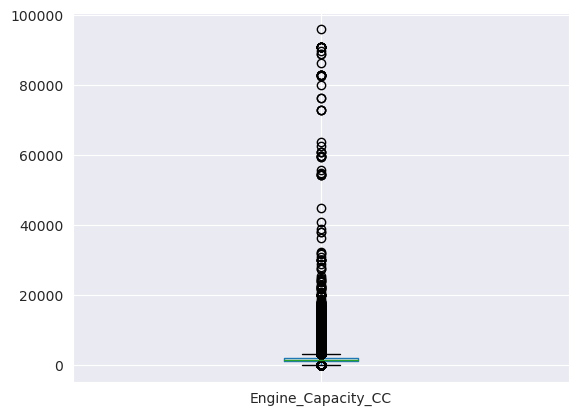

In [72]:
merged[['Engine_Capacity_CC']].boxplot()

In [73]:
merged.groupby('Vehicle_Type')[['Engine_Capacity_CC']].describe()

Engine_Capacity_CC               \
                                                   count         mean   
Vehicle_Type                                                            
Agricultural vehicle                              5501.0  6600.894383   
Bus or coach (17 or more pass seats)             69012.0  7162.002420   
Car                                            1528628.0  1692.521676   
Data missing or out of range                       400.0  1668.567500   
Electric motorcycle                                 78.0   371.576923   
Goods 7.5 tonnes mgw and over                    49235.0  9782.449233   
Goods over 3.5t. and under 7.5t                  17394.0  4238.604231   
Goods vehicle - unknown weight                    1876.0  6387.076759   
Minibus (8 - 16 passenger seats)                  5511.0  2372.577209   
Mobility scooter                                   502.0  1313.217131   
Motorcycle - unknown cc                            741.0   902.784076   
Motorcycle 125cc and under                       59096.0   202.134138   
Motorcycle 50cc and under                        20763.0   147.233011   
Motorcycle over 125cc and up to 500cc            20960.0   488.129055   
Motorcycle over 500cc                            71472.0   861.704654   
Other vehicle                                    12739.0  2820.011147   
Pedal cycle                                      38880.0  2974.902186   
Ridden horse                                       224.0  2518.616071   
Taxi/Private hire car                            43781.0  2075.369178   
Tram                                                42.0  2404.333333   
Van / Goods 3.5 tonnes mgw or under             111573.0  2176.920025   

                                                                              \
                                               std     min      25%      50%   
Vehicle_Type                                                                   
Agricultural vehicle                   1726.388524     6.0  6788.00   7300.0   
Bus or coach (17 or more pass seats)   2677.755640     6.0  6370.00   7300.0   
Car                                     562.508399     1.0  1328.00   1598.0   
Data missing or out of range            852.279674   998.0  1560.00   1560.0   
Electric motorcycle                     872.792719    49.0   124.00    124.0   
Goods 7.5 tonnes mgw and over          3337.514942     3.0  7300.00  11000.0   
Goods over 3.5t. and under 7.5t        2700.334651     2.0  2143.00   3920.0   
Goods vehicle - unknown weight         2928.461256    83.0  4358.75   7300.0   
Minibus (8 - 16 passenger seats)        754.381024    49.0  2143.00   2402.0   
Mobility scooter                        575.344068    49.0  1242.00   1242.0   
Motorcycle - unknown cc                 751.374608    49.0   645.00    999.0   
Motorcycle 125cc and under              380.955388    12.0   124.00    124.0   
Motorcycle 50cc and under               406.384242    10.0    49.00     49.0   
Motorcycle over 125cc and up to 500cc   456.876082    24.0   198.00    400.0   
Motorcycle over 500cc                   397.458433    49.0   599.00    749.0   
Other vehicle                          1947.362963    13.0  1995.00   2402.0   
Pedal cycle                             149.673694    49.0  2987.00   2987.0   
Ridden horse                            323.651192  1870.0  2500.00   2500.0   
Taxi/Private hire car                   463.741243    24.0  1896.00   1997.0   
Tram                                     15.121728  2402.0  2402.00   2402.0   
Van / Goods 3.5 tonnes mgw or under     859.742947     2.0  1870.00   2148.0   

                                                          
                                            75%      max  
Vehicle_Type                                              
Agricultural vehicle                    7300.00  36277.0  
Bus or coach (17 or more pass seats)    8300.00  96000.0  
Car                                     1984.00  54329.0  
Data missi

The Peel P50 was listed in the Guinness World Records in 2010 as the smallest production car ever made up to then.
It has a 49cc, so we can assume that anything under that is in litres and not in cc to multiply by 1,000

Some Motorcycles are also in the wrong scale.  For example, 'Motorcycle 125cc and under' and the max is 12,580
Source: https://en.wikipedia.org/wiki/Peel_P50

In [74]:

merged['Vehicle_Type'] = np.where((merged['Vehicle_Type'] == "Car") & (merged['model'].str.contains('convertible', case=False)), 'Sport_Car', merged['Vehicle_Type'])

merged['Vehicle_Type'] = np.where((merged['Vehicle_Type'] == "Car") & (merged['model'].str.contains('sport', case=False)), 'Sport_Car', merged['Vehicle_Type'])

merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('motorcycle', case=False), 'Motorcycle', merged['Vehicle_Type'])

merged['Vehicle_Type'] = np.where((merged['Vehicle_Type'] == "Car") & (merged['Engine_Capacity_CC'] > 2000), 'Large_Car', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where((merged['Vehicle_Type'] == "Car") & (merged['Engine_Capacity_CC'] <= 1400), 'Small_Car', merged['Vehicle_Type'])

merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('bus', case=False), 'Commercial_Public_Transport', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('taxi', case=False), 'Commercial_Public_Transport', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('goods', case=False), 'Commercial_Public_Transport', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('agricultural', case=False), 'Commercial_Public_Transport', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'].str.contains('tram', case=False), 'Commercial_Public_Transport', merged['Vehicle_Type'])
merged['Vehicle_Type'] = np.where(merged['Vehicle_Type'] == 'Other vehicle', 'Other', merged['Vehicle_Type'])

merged.Vehicle_Type.unique()

array(['Commercial_Public_Transport', 'Car', 'Motorcycle', 'Sport_Car',
       'Large_Car', 'Small_Car', 'Other', 'Pedal cycle', 'Ridden horse',
       'Data missing or out of range', 'Mobility scooter'], dtype=object)

In [75]:
merged.Vehicle_Type = merged.Vehicle_Type.apply(lambda x: x if x in ['Commercial_Public_Transport', 'Motorcycle','Car', 'Sport_Car','Large_Car', 'Small_Car'] else 'Other')

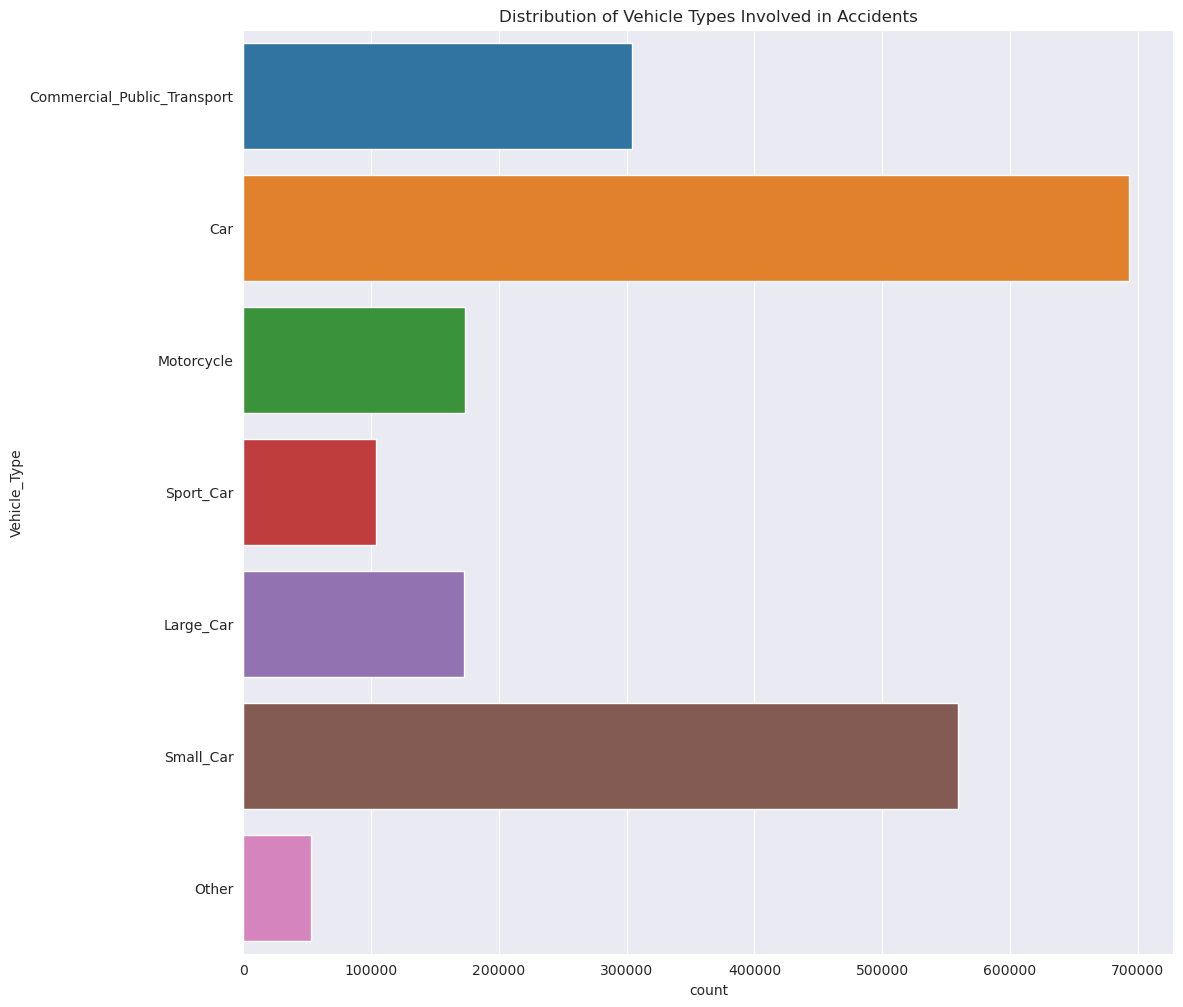

In [76]:
# Visualise the distribution of vehicle types involved in accidents
plt.figure(figsize=(12, 12))
ax = sns.countplot(y='Vehicle_Type', data=merged)
ax.set_title('Distribution of Vehicle Types Involved in Accidents')
plt.savefig('Vehicle_Types_FE.png', bbox_inches='tight')
plt.show()

In [77]:
merged = pd.get_dummies(merged,columns=['Vehicle_Type'], prefix='Vehicle_Type', drop_first=False) # One-Hot Encoding
merged

,Accident_Severity,Date,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Hour,Age_of_Vehicle,Engine_Capacity_CC,make,model,...,Was_Vehicle_Left_Hand_Drive_data_missing_or_out_of_range,Was_Vehicle_Left_Hand_Drive_no,Was_Vehicle_Left_Hand_Drive_yes,Vehicle_Type_Car,Vehicle_Type_Commercial_Public_Transport,Vehicle_Type_Large_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Other,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,0,2005-01-05,1,0,5,17,3,8268.0,VOLVO,MISSING,...,0,1,0,0,1,0,0,0,0,0
200501BS00003,0,2005-01-06,2,0,0,0,5,8300.0,VOLVO,MISSING,...,0,1,0,0,1,0,0,0,0,0
200501BS00004,0,2005-01-07,1,0,0,10,4,1769.0,NISSAN,ALMERA SE AUTO,...,0,1,0,1,0,0,0,0,0,0
200501BS00005,0,2005-01-10,1,0,0,21,10,85.0,HONDA,SES 125-4,...,0,1,0,0,0,0,1,0,0,0
200501BS00006,0,2005-01-11,2,0,0,12,1,2976.0,AUDI,A4 SPORT CABRIOLET AUTO,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,0,2016-11-01,2,0,0,16,14,1598.0,MINI,MINI COOPER,...,0,1,0,1,0,0,0,0,0,0
2016984131116,0,2016-11-01,2,0,0,16,3,1598.0,VAUXHALL,ASTRA ENERGY CDTI,...,0,1,0,1,0,0,0,0,0,0
2016984131216,0,2016-10-27,1,0,0,7,7,7300.0,VOLVO,MISSING,...,0,1,0,0,1,0,0,0,0,0


In [78]:
merged = merged.drop(columns=['Engine_Capacity_CC','make','model'])

### Date and Hour

In [79]:
merged['Time_of_Day'] = np.where((merged['Hour'] >= 0) & (merged['Hour'] < 5), 'Night', merged['Hour'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 5) & (merged['Hour'] < 9), 'Early_Morning', merged['Time_of_Day'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 9) & (merged['Hour'] < 12), 'Late_Morning', merged['Time_of_Day'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 12) & (merged['Hour'] < 15), 'Early_Afternoon', merged['Time_of_Day'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 15) & (merged['Hour'] < 17), 'Late_Afternoon', merged['Time_of_Day'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 17) & (merged['Hour'] < 19), 'Evening', merged['Time_of_Day'])
merged['Time_of_Day'] = np.where((merged['Hour'] >= 19) & (merged['Hour'] < 24), 'Night', merged['Time_of_Day'])
merged.drop(columns=['Hour'], inplace=True)
merged['Time_of_Day'].unique()

array(['Evening', 'Night', 'Late_Morning', 'Early_Afternoon',
       'Early_Morning', 'Late_Afternoon'], dtype=object)

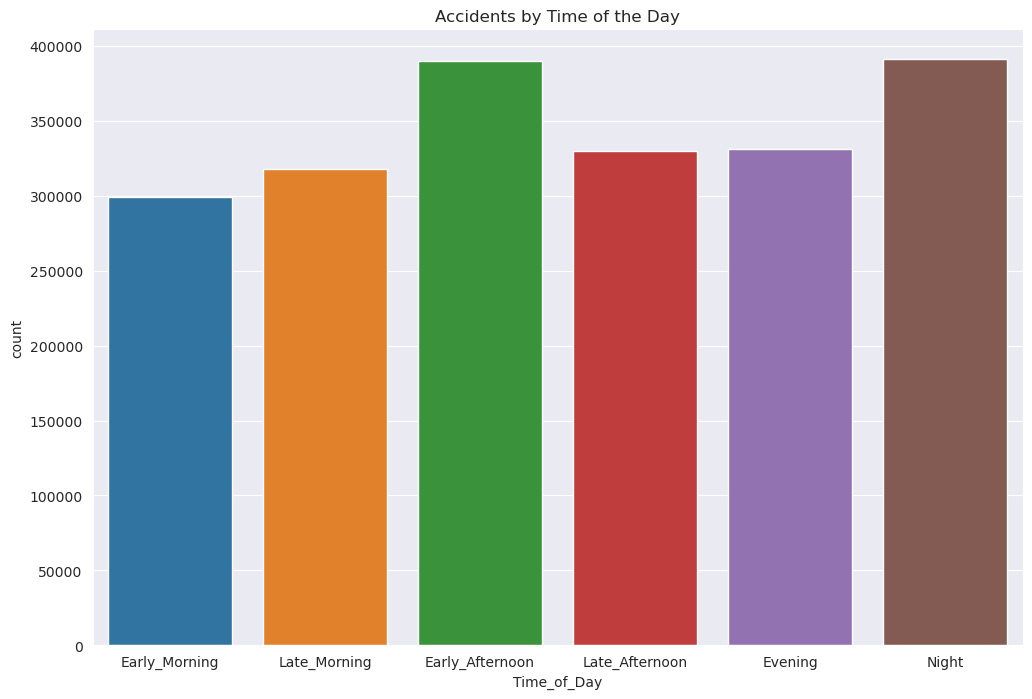

In [80]:
time_order = ['Early_Morning','Late_Morning', 'Early_Afternoon','Late_Afternoon', 'Evening', 'Night']

plt.figure(figsize=(12, 8))
sns.countplot(data=merged, x='Time_of_Day', order=time_order)
plt.title("Accidents by Time of the Day")
plt.savefig('Accidents_by_Time_of_Day_bar.png', bbox_inches='tight')
plt.show()

In [81]:
merged = pd.get_dummies(merged,columns=['Time_of_Day'], prefix='Time_of_Day', drop_first=False) # One-Hot Encoding
merged

,Accident_Severity,Date,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Age_of_Vehicle,Vehicle_Location.Restricted_Lane,Sex_of_Driver_data_missing_or_out_of_range,Sex_of_Driver_female,Sex_of_Driver_male,...,Vehicle_Type_Motorcycle,Vehicle_Type_Other,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Early_Afternoon,Time_of_Day_Early_Morning,Time_of_Day_Evening,Time_of_Day_Late_Afternoon,Time_of_Day_Late_Morning,Time_of_Day_Night
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,0,2005-01-05,1,0,5,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
200501BS00003,0,2005-01-06,2,0,0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
200501BS00004,0,2005-01-07,1,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
200501BS00005,0,2005-01-10,1,0,0,10,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
200501BS00006,0,2005-01-11,2,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,0,2016-11-01,2,0,0,14,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2016984131116,0,2016-11-01,2,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2016984131216,0,2016-10-27,1,0,0,7,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


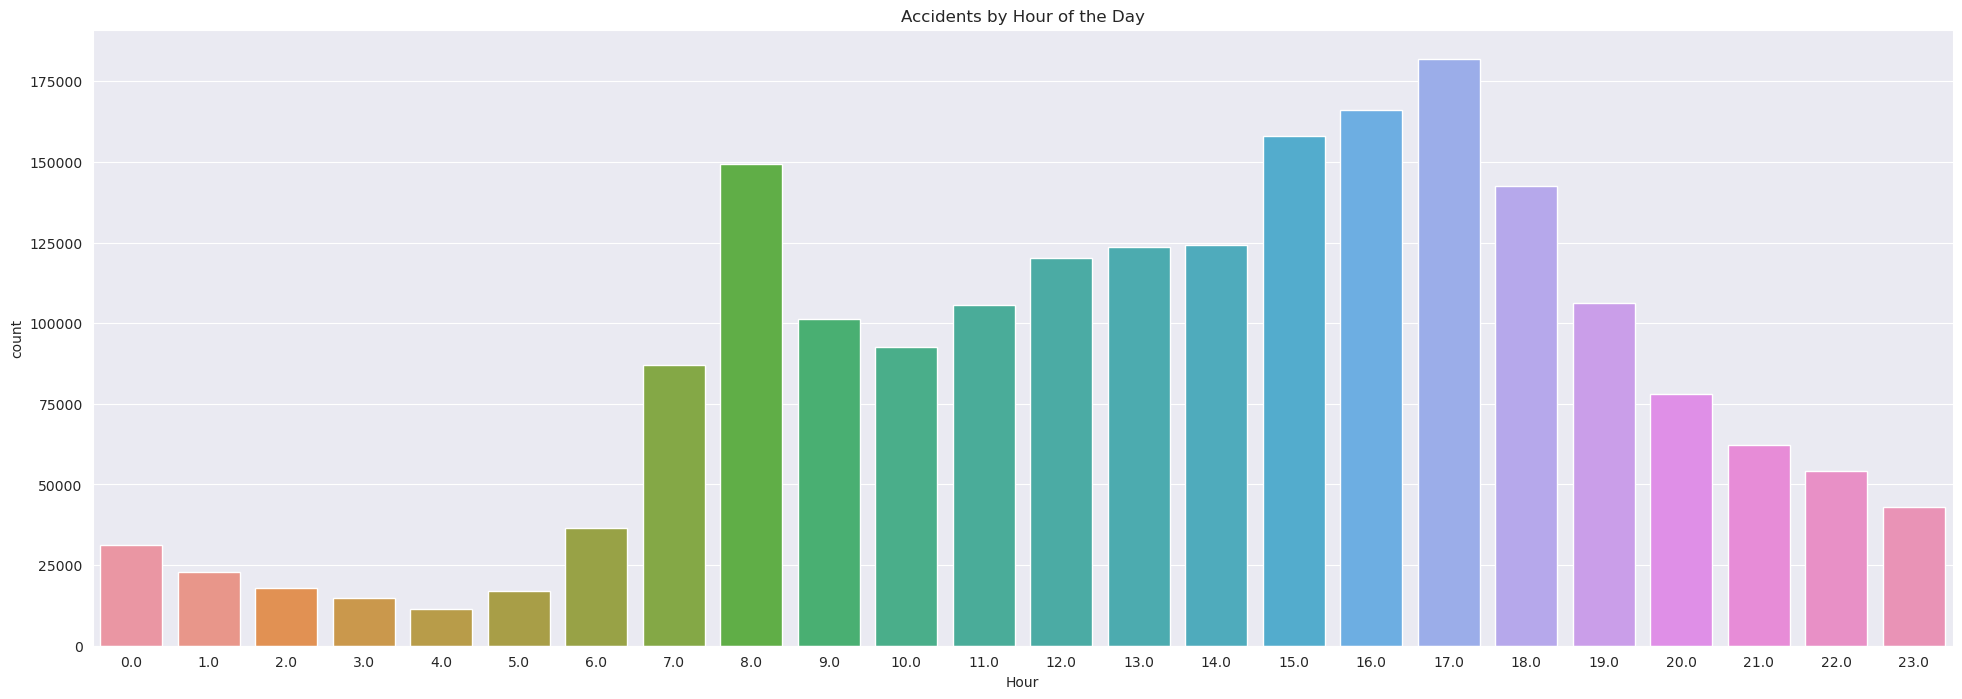

In [82]:
# Drill-down accidents to the hour of the day

plt.figure(figsize=(24, 8))
accidents['Time'] = pd.to_datetime(accidents['Time'], format="%H:%M")
accidents['Hour'] = accidents['Time'].dt.hour
sns.countplot(data=accidents, x='Hour')
plt.title("Accidents by Hour of the Day")
plt.show()

In [83]:
merged['Day_of_Month'] = merged.Date.dt.day
merged['Day_of_Year'] = merged.Date.dt.dayofyear
merged.drop(columns=['Date'], inplace=True)
merged[['Day_of_Month','Day_of_Year']]

,Day_of_Month,Day_of_Year
Accident_Index,,
200501BS00002,5,5
200501BS00003,6,6
200501BS00004,7,7
200501BS00005,10,10
200501BS00006,11,11
...,...,...
2016984131116,1,306
2016984131116,1,306
2016984131216,27,301


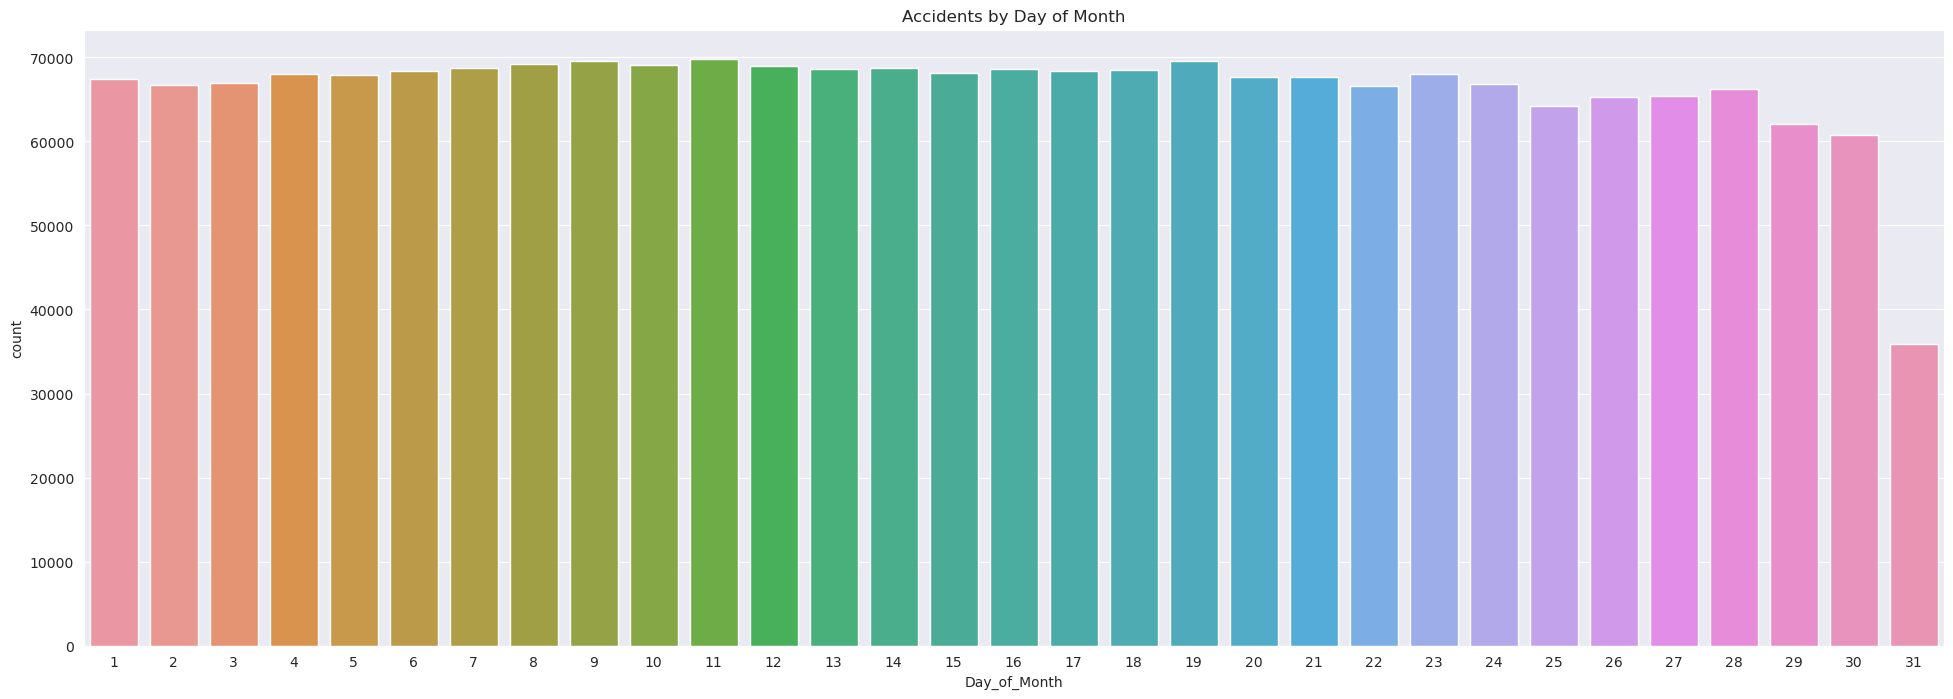

In [84]:
plt.figure(figsize=(24, 8))
sns.countplot(data=merged, x='Day_of_Month')
plt.title("Accidents by Day of Month")
plt.show()

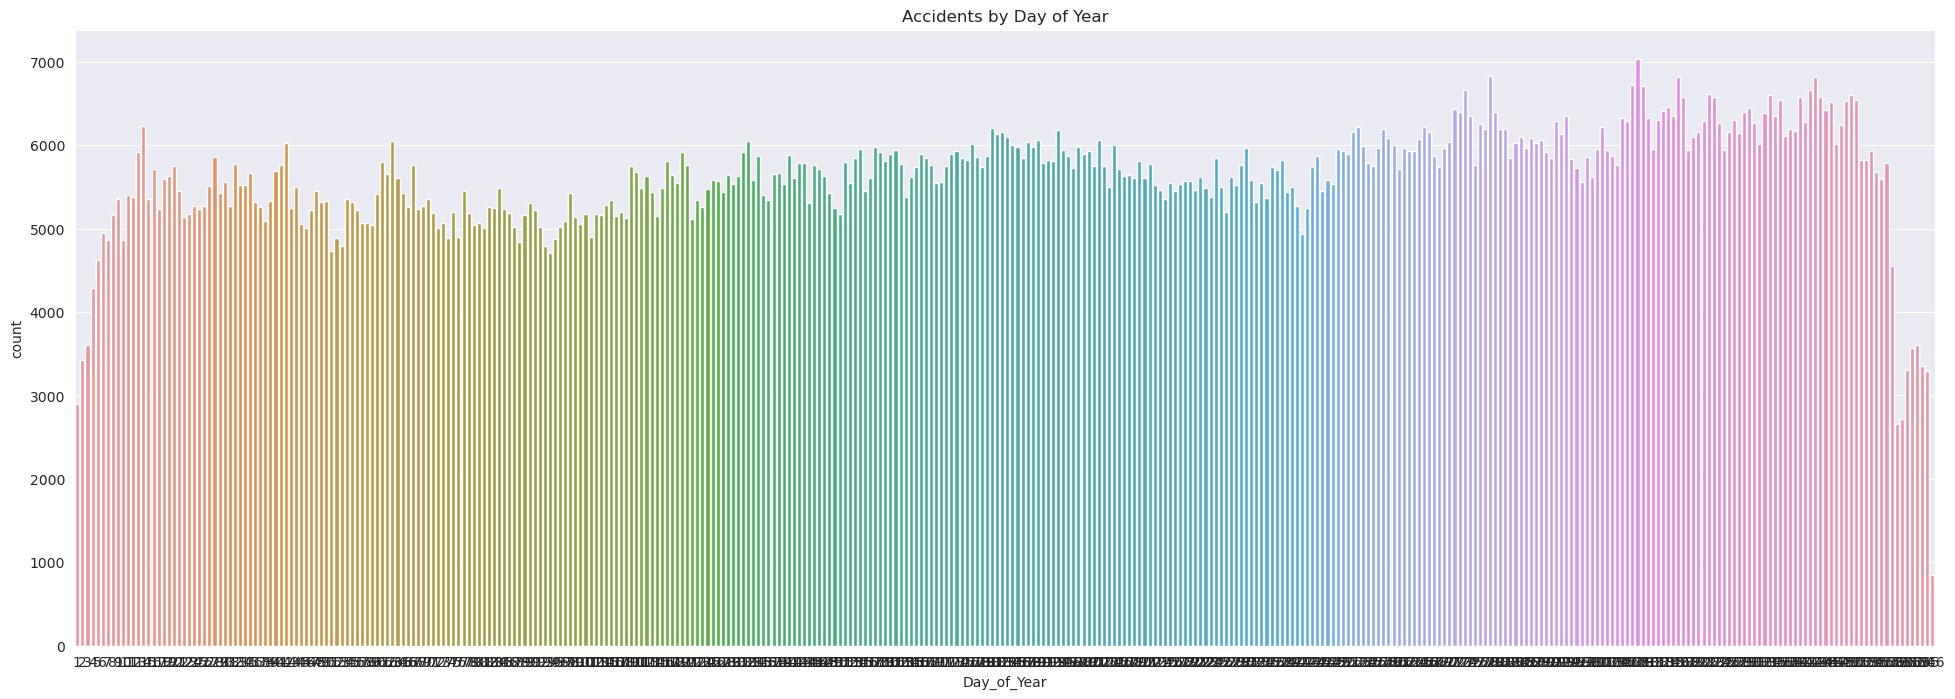

In [85]:
plt.figure(figsize=(24, 8))
sns.countplot(data=merged, x='Day_of_Year')
plt.title("Accidents by Day of Year")
plt.show()

Looks like there is seasonality

In [86]:
merged

,Accident_Severity,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Age_of_Vehicle,Vehicle_Location.Restricted_Lane,Sex_of_Driver_data_missing_or_out_of_range,Sex_of_Driver_female,Sex_of_Driver_male,Sex_of_Driver_not_known,...,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Early_Afternoon,Time_of_Day_Early_Morning,Time_of_Day_Evening,Time_of_Day_Late_Afternoon,Time_of_Day_Late_Morning,Time_of_Day_Night,Day_of_Month,Day_of_Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,0,1,0,5,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,5,5
200501BS00003,0,2,0,0,5,0,0,0,1,0,...,0,0,0,0,0,0,0,1,6,6
200501BS00004,0,1,0,0,4,0,0,1,0,0,...,0,0,0,0,0,0,1,0,7,7
200501BS00005,0,1,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,1,10,10
200501BS00006,0,2,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,0,2,0,0,14,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131116,0,2,0,0,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131216,0,1,0,0,7,0,0,0,1,0,...,0,0,0,1,0,0,0,0,27,301


# Data Mining

### Functions

In [87]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2

def select_features_regularisation(x_input, y_input, type):
    X_train, X_test, y_train, y_test = train_test_split(
        x_input,
        y_input,
        test_size=0.3,
        random_state=random_state)

    # Liblinear supports L1 regularisation (Lasso regression) and L2 regularisation (Ridge regression)
    sel_ = SelectFromModel(LogisticRegression(C=1, penalty=type, solver='liblinear'))
    sel_.fit(X_train, np.ravel(y_train,order='C'))
    sel_.get_support()
    X_train = pd.DataFrame(X_train)
    selected_features = X_train.columns[(sel_.get_support())] # Trues are for features thought are important
    print(f'Total features: {X_train.shape[1]}')
    print(f'Selected {len(selected_features)} features: {selected_features}')
    print(f'Features with coefficients set to zero: {np.sum(sel_.estimator_.coef_ == 0)}')
    return x_input[selected_features]

# Code inspired by https://machinelearningmastery.com/feature-selection-with-categorical-data/
def select_features_chi_squared(x_input, y_input):
    X_train, X_test, y_train, y_test = train_test_split(
        x_input,
        y_input,
        test_size=0.3,
        random_state=random_state)
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def calculate_chi_squared_scores(x_input, y_input):
    X_train_fs, X_test_fs, fs = select_features_chi_squared(x_input, y_input)
    feature_names = fs.get_feature_names_out(x_input.columns)
    feature_scores_dict = {feature_names[i]: fs.scores_[i] for i in range(len(fs.scores_))}
    df_feature_scores = pd.DataFrame.from_dict(feature_scores_dict, orient='index', columns=['score'])
    return df_feature_scores

def plot_feature_scores(x_input, y_input, title='Feature Scores', savefig=None, max=100):
    chi2_features = calculate_chi_squared_scores(x_input, y_input)
    chi2_features_sorted = chi2_features.sort_values(by='score', ascending=False)
    feat_scores = chi2_features_sorted
    chi2_features_sorted = chi2_features_sorted[:max]

    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size for better readability
    chi2_features_sorted.plot(kind='bar', ax=ax)

    # Rotate x-axis labels and set other axis properties
    #ax.set_xticklabels(chi2_features_sorted.index, rotation=45, ha='right')  # Rotate x-axis labels
    shortened_labels = [truncate_label(label) for label in chi2_features_sorted.index]
    ax.set_xticklabels(shortened_labels, rotation=45, ha='right')  # Rotate x-axis labels and use shortened labels

    ax.set_xlabel('Feature')
    ax.set_ylabel('Score')
    ax.set_title(f'Top {max} {title}')

    plt.tight_layout()  # Ensure labels fit within the figure

    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()
    return feat_scores

def truncate_label(label, max_length=30):
    if len(label) > max_length:
        return '…' + label[-(max_length-1):]
    return label


def contingency_table_and_critical_value(data, variable1, variable2, significance_level=0.05):
    contingency_table = pd.crosstab(data[variable1], data[variable2])

    # Perform the chi-square test
    chi2_stat, p_value, degrees_of_freedom, _ = chi2_contingency(contingency_table)
    critical_value = scipy.stats.chi2.ppf(1 - significance_level, degrees_of_freedom)

    return contingency_table, chi2_stat, p_value, degrees_of_freedom, critical_value


### Numerical Scaling

In [102]:
# Build the list of numerical columns
#numerical_columns = ['Number_of_Casualties', 'Number_of_Vehicles',
#                     'Pedestrian_Crossing-Human_Control',
#                     'Pedestrian_Crossing-Physical_Facilities',
#                     'Age_of_Vehicle','Speed_limit']

numerical_columns = ['Number_of_Vehicles',
                     'Pedestrian_Crossing-Human_Control',
                     'Pedestrian_Crossing-Physical_Facilities',
                     'Age_of_Vehicle']


#X_numerical_data = merged[numerical_columns]
X_numerical_data = merged.drop(columns=['Day_of_Month','Day_of_Year','Accident_Severity'])
numerical_columns = X_numerical_data.columns
X_numerical_data

,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Age_of_Vehicle,Vehicle_Location.Restricted_Lane,Sex_of_Driver_data_missing_or_out_of_range,Sex_of_Driver_female,Sex_of_Driver_male,Sex_of_Driver_not_known,Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach,...,Vehicle_Type_Motorcycle,Vehicle_Type_Other,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Early_Afternoon,Time_of_Day_Early_Morning,Time_of_Day_Evening,Time_of_Day_Late_Afternoon,Time_of_Day_Late_Morning,Time_of_Day_Night
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,1,0,5,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
200501BS00003,2,0,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
200501BS00004,1,0,0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200501BS00005,1,0,0,10,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
200501BS00006,2,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,2,0,0,14,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2016984131116,2,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2016984131216,1,0,0,7,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_numerical_scaled_minmax = scaler.fit_transform(merged.drop('Accident_Severity', axis=1))
X_numerical_scaled_minmax

array([[0.        , 0.        , 0.625     , ..., 0.        , 0.13333333,
        0.0109589 ],
       [0.01515152, 0.        , 0.        , ..., 1.        , 0.16666667,
        0.01369863],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
        0.01643836],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.86666667,
        0.82191781],
       [0.        , 0.        , 0.        , ..., 1.        , 0.93333333,
        0.82739726],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.98356164]])

## PCA

In [89]:
from sklearn.decomposition import PCA

# 0.95 means keeping 95% of the explained variance
pca = PCA(n_components=0.95)

numerical_reduced_pca = pca.fit_transform(X_numerical_scaled_minmax)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

pca_cols = ["PC" + str(i+1) for i in range(numerical_reduced_pca.shape[1])]
numerical_reduced_pca = pd.DataFrame(numerical_reduced_pca, columns=pca_cols)
numerical_reduced_pca

Explained variance ratio: [0.08874857 0.04590707 0.04151887 0.03829283 0.03349098 0.03262146
 0.02777831 0.02657772 0.02509842 0.02357409 0.02335938 0.02020431
 0.0199534  0.01780309 0.0166034  0.01624393 0.01565503 0.01496508
 0.01484134 0.0139451  0.01343201 0.0131263  0.0128551  0.01265272
 0.01232576 0.01222902 0.01216939 0.01204174 0.01162461 0.01105016
 0.01069504 0.01037497 0.01013803 0.00993756 0.00938378 0.00881407
 0.00871832 0.00843797 0.00829363 0.00807816 0.00781446 0.00734912
 0.00729099 0.00719792 0.00704988 0.00679994 0.00639849 0.00626011
 0.00610665 0.00595283 0.00571605 0.00549592 0.00512263 0.00495504
 0.00473928 0.00441047 0.00429811 0.00418755 0.00386485 0.00382581
 0.00380914 0.00375883 0.00362103 0.00358408 0.00353199 0.00345432
 0.0030341  0.00299087 0.00286528 0.0026975  0.00262647 0.00253356
 0.0024986  0.00240172 0.00230455 0.00224534 0.00216336 0.00212805
 0.00209184 0.0019961  0.00193571 0.001891   0.00187877]
Cumulative explained variance: [0.08874857 0.1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
0,-0.235972,-0.191311,0.909421,-0.672594,0.350007,-1.182620,0.463247,0.323016,0.968946,0.125525,...,-0.056125,-0.000387,0.009453,-0.017699,-0.014599,0.055452,0.231139,-0.149492,-0.033452,0.012110
1,1.021574,-0.078139,-0.182341,-1.394240,0.305806,-1.266995,0.031936,0.412374,0.697197,0.197459,...,-0.027944,-0.301450,0.019507,-0.105061,-0.046669,0.060809,0.212288,-0.179237,0.010646,-0.052802
2,0.958230,-0.683756,-0.522096,0.353572,0.210385,0.280783,-0.952506,0.643465,-0.519125,-1.301567,...,0.011685,0.015873,-0.003678,-0.046033,0.003030,-0.032948,-0.000355,0.007343,-0.002060,-0.010410
3,1.265478,1.138042,-0.814884,-1.222336,0.117136,0.374646,0.073804,0.724128,0.283429,-0.108001,...,0.141942,-0.131537,0.049713,-0.025489,-0.000558,-0.137081,0.030726,-0.012970,-0.082782,-0.039607
4,1.063355,0.719640,-0.609962,-0.447422,-1.504004,-0.807234,-0.565184,-0.008592,0.058781,-0.238270,...,0.035787,0.087107,-0.115664,-0.035647,0.012707,0.071238,-0.117829,0.007714,0.125807,-0.008112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058403,-0.705490,-0.296904,-0.512987,0.617668,0.485283,1.042120,-0.418450,-0.323364,-0.864631,0.015087,...,0.006850,0.004453,-0.035552,-0.015442,0.049362,0.015474,-0.010188,0.008724,-0.020212,0.027372
2058404,-0.520798,-0.157519,-0.353514,0.622925,0.055490,1.551743,0.050004,0.559258,-0.598603,0.021454,...,0.027820,-0.003767,-0.047422,-0.135790,-0.889614,0.086141,-0.040312,0.008651,-0.008681,0.034702
2058405,1.827373,0.750613,1.151810,-0.401650,-0.283433,-0.222010,-0.535780,-0.111812,0.540836,1.132062,...,0.165684,-0.116085,0.175856,-0.018454,0.192478,-0.028833,-0.043195,-0.379083,0.319842,0.073051
2058406,1.475982,0.629820,-0.373551,-0.954441,1.519284,0.644883,0.224734,0.233977,-0.916283,0.758880,...,0.181873,-0.108699,0.071748,-0.113970,-0.423329,-0.024943,-0.057173,0.004693,0.081623,0.064219


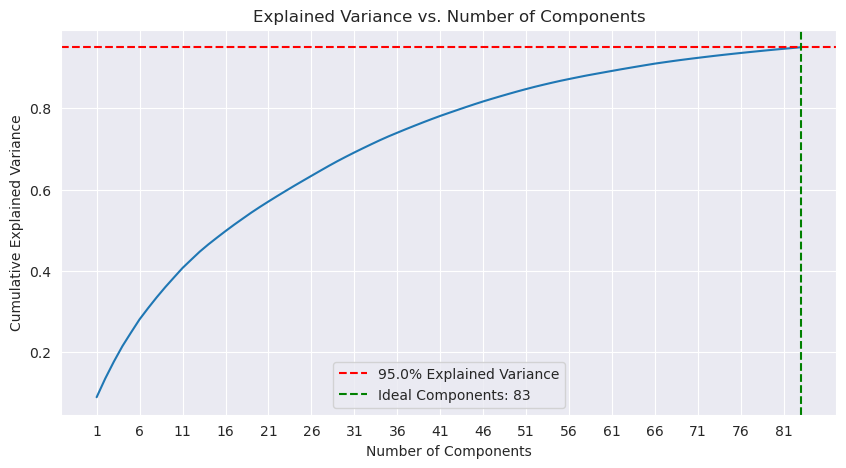

In [90]:
#Visualize the explained variance ratio:
variance_threshold = 0.95
plt.figure(figsize=(10, 5))
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1, 5))  # Display every 5th component on the x-axis
plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f"{variance_threshold *100}% Explained Variance")
#plt.legend()

# Find the ideal number of components
ideal_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
plt.axvline(x=ideal_components, color='g', linestyle='--', label=f"Ideal Components: {ideal_components}")

plt.legend()
plt.savefig('Figure_PCA_variance_ratio_minmax_scale.png', bbox_inches='tight')
plt.show()


## Categorical KBest Features

In [104]:
X_categorical_data = merged.drop(columns=numerical_columns)
X_categorical_data = merged.drop(columns=['Accident_Severity'])
categorical_columns = X_categorical_data.columns
X_categorical_data

,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Age_of_Vehicle,Vehicle_Location.Restricted_Lane,Sex_of_Driver_data_missing_or_out_of_range,Sex_of_Driver_female,Sex_of_Driver_male,Sex_of_Driver_not_known,Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach,...,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Early_Afternoon,Time_of_Day_Early_Morning,Time_of_Day_Evening,Time_of_Day_Late_Afternoon,Time_of_Day_Late_Morning,Time_of_Day_Night,Day_of_Month,Day_of_Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,1,0,5,3,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,5,5
200501BS00003,2,0,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,6,6
200501BS00004,1,0,0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,7,7
200501BS00005,1,0,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,10,10
200501BS00006,2,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,2,0,0,14,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131116,2,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131216,1,0,0,7,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,27,301


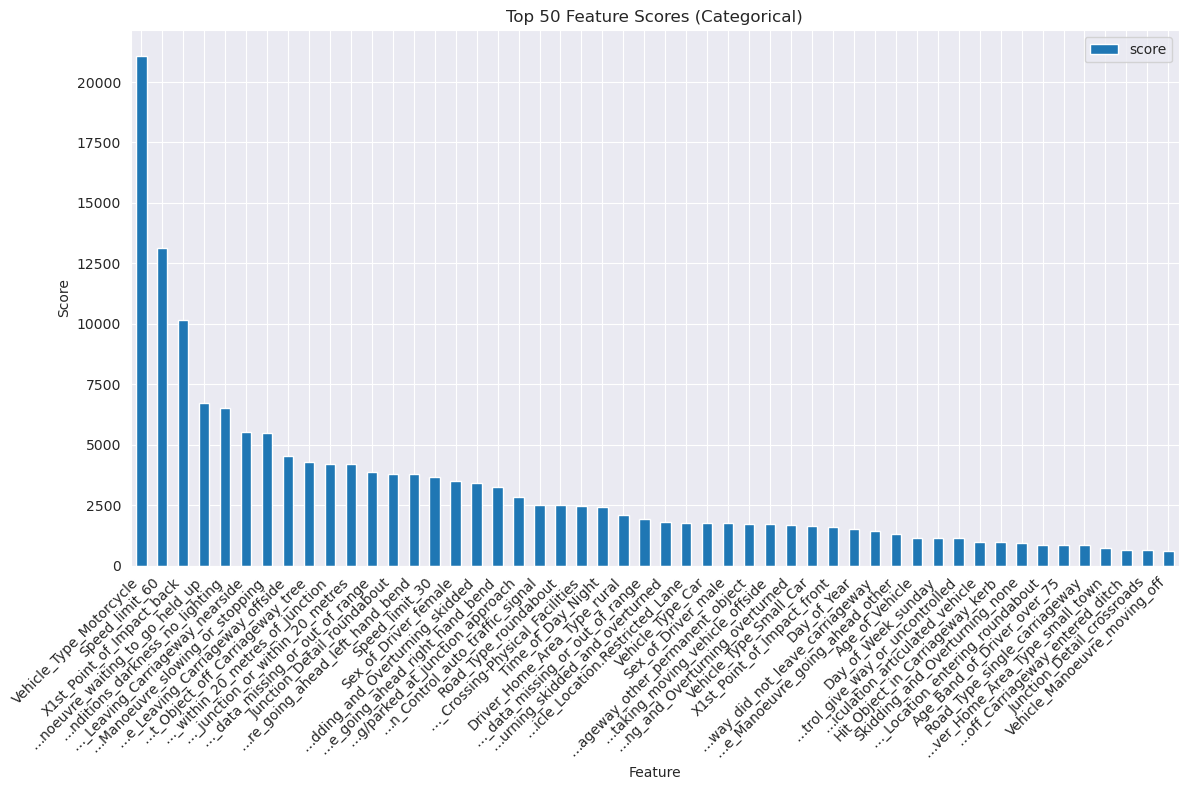

,score
Vehicle_Type_Motorcycle,21083.722358
Speed_limit_60,13148.442530
X1st_Point_of_Impact_back,10165.738230
Vehicle_Manoeuvre_waiting_to_go_held_up,6738.201664
Light_Conditions_darkness_no_lighting,6528.532851
...,...
Speed_limit_0,0.166256
Special_Conditions_at_Site_road_sign_or_marking_defective_or_obscured,0.119080
Special_Conditions_at_Site_mud,0.089504
Age_Band_of_Driver_0_5,0.052125


In [105]:
plot_feature_scores(merged[categorical_columns], merged.Accident_Severity, 'Feature Scores (Categorical)',max=50)

## Lasso

In [95]:
X_categorical_reduced_lasso = select_features_regularisation(X_categorical_data, merged.Accident_Severity,'l1')
X_categorical_reduced_lasso

Total features: 219
Selected 211 features: Index(['Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Age_of_Vehicle',
       'Vehicle_Location.Restricted_Lane',
       'Sex_of_Driver_data_missing_or_out_of_range', 'Sex_of_Driver_female',
       'Sex_of_Driver_male', 'Sex_of_Driver_not_known',
       'Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach',
       ...
       'Vehicle_Type_Small_Car', 'Vehicle_Type_Sport_Car',
       'Time_of_Day_Early_Afternoon', 'Time_of_Day_Early_Morning',
       'Time_of_Day_Evening', 'Time_of_Day_Late_Afternoon',
       'Time_of_Day_Late_Morning', 'Time_of_Day_Night', 'Day_of_Month',
       'Day_of_Year'],
      dtype='object', length=211)
Features with coefficients set to zero: 8


,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Age_of_Vehicle,Vehicle_Location.Restricted_Lane,Sex_of_Driver_data_missing_or_out_of_range,Sex_of_Driver_female,Sex_of_Driver_male,Sex_of_Driver_not_known,Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach,...,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Early_Afternoon,Time_of_Day_Early_Morning,Time_of_Day_Evening,Time_of_Day_Late_Afternoon,Time_of_Day_Late_Morning,Time_of_Day_Night,Day_of_Month,Day_of_Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,1,0,5,3,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,5,5
200501BS00003,2,0,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,6,6
200501BS00004,1,0,0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,7,7
200501BS00005,1,0,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,10,10
200501BS00006,2,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,2,0,0,14,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131116,2,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,306
2016984131216,1,0,0,7,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,27,301


## Ridge

In [96]:
X_categorical_reduced_ridge= select_features_regularisation(merged.drop('Accident_Severity', axis=1), merged.Accident_Severity,'l2')
X_categorical_reduced_ridge

Total features: 219
Selected 78 features: Index(['Sex_of_Driver_female', 'Sex_of_Driver_male',
       'Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach',
       'Junction_Location_cleared_junction_or_waiting/parked_at_junction_exit',
       'Junction_Location_data_missing_or_out_of_range',
       'Junction_Location_entering_from_slip_road',
       'Junction_Location_mid_junction_on_roundabout_or_on_main_road',
       'Junction_Location_not_at_or_within_20_metres_of_junction',
       'X1st_Point_of_Impact_back', 'Vehicle_Manoeuvre_changing_lane_to_left',
       'Vehicle_Manoeuvre_changing_lane_to_right',
       'Vehicle_Manoeuvre_going_ahead_left_hand_bend',
       'Vehicle_Manoeuvre_going_ahead_right_hand_bend',
       'Vehicle_Manoeuvre_overtaking_nearside', 'Vehicle_Manoeuvre_parked',
       'Vehicle_Manoeuvre_reversing', 'Vehicle_Manoeuvre_slowing_or_stopping',
       'Vehicle_Manoeuvre_turning_right', 'Vehicle_Manoeuvre_u_turn',
       'Vehicle_Manoeuvr

,Sex_of_Driver_female,Sex_of_Driver_male,Junction_Location_approaching_junction_or_waiting/parked_at_junction_approach,Junction_Location_cleared_junction_or_waiting/parked_at_junction_exit,Junction_Location_data_missing_or_out_of_range,Junction_Location_entering_from_slip_road,Junction_Location_mid_junction_on_roundabout_or_on_main_road,Junction_Location_not_at_or_within_20_metres_of_junction,X1st_Point_of_Impact_back,Vehicle_Manoeuvre_changing_lane_to_left,...,Was_Vehicle_Left_Hand_Drive_data_missing_or_out_of_range,Was_Vehicle_Left_Hand_Drive_no,Was_Vehicle_Left_Hand_Drive_yes,Vehicle_Type_Car,Vehicle_Type_Large_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Other,Vehicle_Type_Small_Car,Vehicle_Type_Sport_Car,Time_of_Day_Late_Morning
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
200501BS00003,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
200501BS00004,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
200501BS00005,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
200501BS00006,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016984131116,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2016984131116,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2016984131216,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## MCA Analysis

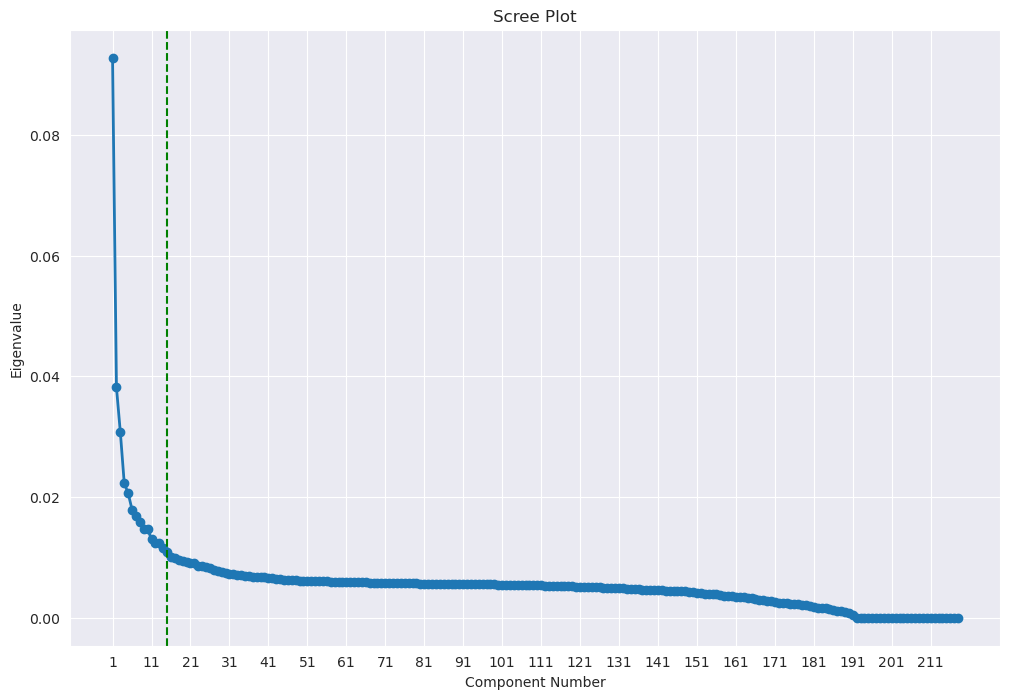

In [92]:
if not 'prince' in sys.modules:
    !pip install prince

import prince

mca = prince.MCA(n_components=220,
                 n_iter=3,
                 copy=True,
                 check_input=True,
                 engine='sklearn',
                 random_state=random_state)
mca_all_components = mca.fit(merged.drop('Accident_Severity', axis=1))

eigenvalues = mca_all_components.eigenvalues_

# Compute explained inertia manually
total_inertia = np.sum(eigenvalues)
explained_inertia = [eig / total_inertia for eig in eigenvalues]

summary_df = pd.DataFrame({'Eigenvalue': eigenvalues, 'Explained Inertia': explained_inertia})

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(eigenvalues) + 1, 10))
plt.axvline(x=15, color='g', linestyle='--', label=f"Ideal Components: 15")
#plt.grid(True)
plt.savefig('Figure_MCA_3.png', bbox_inches='tight')
plt.show()

Ideal number of components is 15

In [106]:
if not 'prince' in sys.modules:
    !pip install prince

import prince


mca_15 = prince.MCA(n_components=15,
                 n_iter=3,
                 copy=True,
                 check_input=True,
                 engine='sklearn',
                 random_state=random_state)
mca_15_X = merged.drop('Accident_Severity', axis=1)
mca_15_fit = mca_15.fit(mca_15_X)

coord = mca_15.row_coordinates(mca_15_X)
mca_15_components = coord.iloc[:, :15]
mca_15_components

NameError: name 'prince' is not defined

In [ ]:
if not 'prince' in sys.modules:
    !pip install prince

import prince
X_categorical_data_mca = merged.drop('Accident_Severity', axis=1)#X_categorical_data

mca = prince.MCA(n_components=19,
                 n_iter=3,
                 copy=True,
                 check_input=True,
                 engine='sklearn',
                 random_state=random_state
                 )

mca = mca.fit(X_categorical_data_mca) # same as calling ca.fs_r(1)


In [ ]:
mca.eigenvalues_summary

In [ ]:
col_coords = mca.column_coordinates(X_categorical_data_mca)
col_coords

In [ ]:
mca.column_contributions_.head(21).style.format('{:.0%}')

In [ ]:

mca = prince.MCA(n_components=18,
                 n_iter=3,
                 copy=True,
                 check_input=True,
                 engine='sklearn',
                 random_state=random_state
                 )
mca = mca.fit(X_categorical_data_mca) # same as calling ca.fs_r(1)
mca.eigenvalues_summary

In [ ]:
eigenvalues = mca.eigenvalues_
explained_inertia = mca.explained_inertia_

summary_df = pd.DataFrame({'Eigenvalue': eigenvalues, 'Explained Inertia': explained_inertia})

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

In [ ]:
col_coords = mca.column_coordinates(X_categorical_data_mca)
mca.column_contributions_.head(21).style.format('{:.0%}')

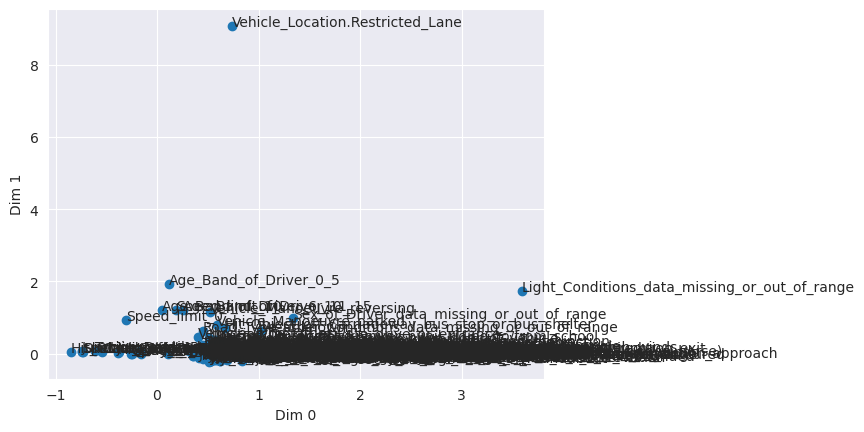

In [103]:
x = col_coords.iloc[:,0]
y = col_coords.iloc[:,1]
t = list(col_coords.index)
# plot x and y on scatter plot
plt.scatter(x, y)
# add axes labels
plt.xlabel('Dim 0')
plt.ylabel('Dim 1')


for i in range(len(x)):
    plt.text(x[i],y[i], t[i])

plt.savefig('Figure_MCA_2.png', bbox_inches='tight')
plt.show()

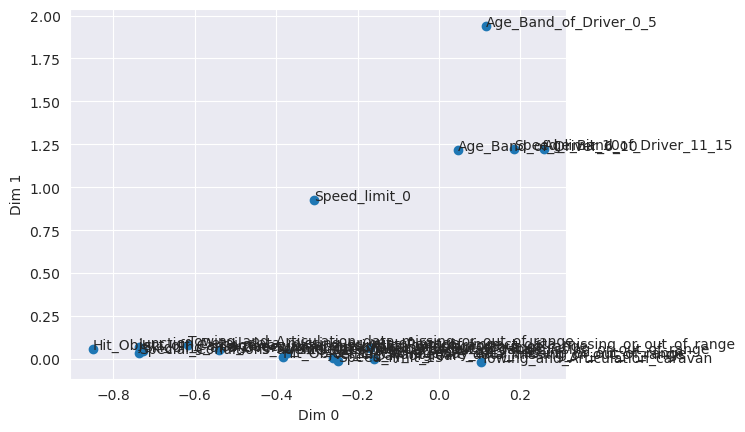

In [104]:
# Get the boolean mask for values less than or equal to 0.3
mask = col_coords.iloc[:, 0] <= 0.3

# Filter x, y, and t using the mask
x = col_coords.loc[mask, 0]
y = col_coords.loc[mask, 1]
t = list(col_coords[mask].index)
# plot x and y on scatter plot
plt.scatter(x, y)
# add axes labels
plt.xlabel('Dim 0')
plt.ylabel('Dim 1')


for i in range(len(x)):
    plt.text(x[i],y[i], t[i])

plt.savefig('Figure_MCA_2.png', bbox_inches='tight')
plt.show()

## Chi-square K-Best Features

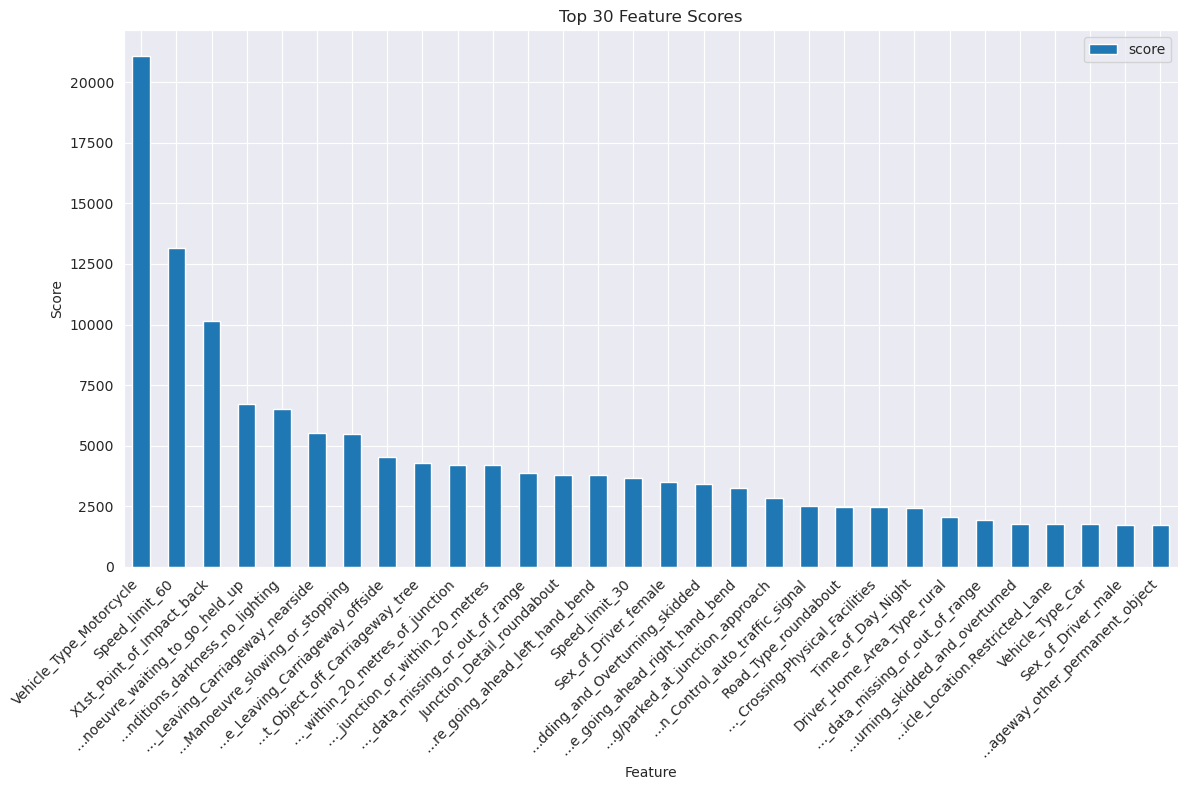

In [105]:
features = merged.drop(columns='Accident_Severity').columns

feature_scores = plot_feature_scores(merged[features], merged.Accident_Severity, 'Feature Scores','ChiSquared_Feature_Scores.png', max=30)

## Descriptive statistics

In [106]:
# The percentage of feature with severity = 1 over the entire dataset
percentages = merged.apply(lambda x: x[x == 1].count()).to_frame()
percentages['percentage_all'] = ((percentages / merged.shape[0]) * 100).values

percentages1 = merged.query('Accident_Severity == 1').apply(lambda x: x[x ==1 ].count()).to_frame()
percentages1['percentage_severe'] = ((percentages1 / merged.shape[0]) * 100).values

percentages = pd.merge(percentages,percentages1[['percentage_severe']],how='inner',left_index=True,right_index=True)
percentages

,0,percentage_all,percentage_severe
Accident_Severity,292758,14.222545,14.222545
Number_of_Vehicles,344065,16.715102,3.714521
Pedestrian_Crossing-Human_Control,4220,0.205013,0.019967
Pedestrian_Crossing-Physical_Facilities,49753,2.417062,0.271666
Age_of_Vehicle,182255,8.854173,1.267484
...,...,...,...
Time_of_Day_Late_Afternoon,329822,16.023160,2.227207
Time_of_Day_Late_Morning,317947,15.446257,1.958455
Time_of_Day_Night,391242,19.007019,3.318584
Day_of_Month,67447,3.276658,0.471772


In [107]:
scores = calculate_chi_squared_scores(merged[features], merged.Accident_Severity).sort_values(by='score',ascending=False)
scores['rank'] = scores['score'].rank(ascending=False)
scores

,score,rank
Vehicle_Type_Motorcycle,21083.722358,1.0
Speed_limit_60,13148.442530,2.0
X1st_Point_of_Impact_back,10165.738230,3.0
Vehicle_Manoeuvre_waiting_to_go_held_up,6738.201664,4.0
Light_Conditions_darkness_no_lighting,6528.532851,5.0
...,...,...
Speed_limit_0,0.166256,215.0
Special_Conditions_at_Site_road_sign_or_marking_defective_or_obscured,0.119080,216.0
Special_Conditions_at_Site_mud,0.089504,217.0
Age_Band_of_Driver_0_5,0.052125,218.0


In [108]:
stats = pd.merge(percentages,scores,how='inner',left_index=True,right_index=True).sort_values(by='rank')
stats

,0,percentage_all,percentage_severe,score,rank
Vehicle_Type_Motorcycle,173110,8.409897,2.422309,21083.722358,1.0
Speed_limit_60,317097,15.404963,3.511889,13148.442530,2.0
X1st_Point_of_Impact_back,388912,18.893825,1.414928,10165.738230,3.0
Vehicle_Manoeuvre_waiting_to_go_held_up,145922,7.089071,0.375824,6738.201664,4.0
Light_Conditions_darkness_no_lighting,99708,4.843938,1.206952,6528.532851,5.0
...,...,...,...,...,...
Speed_limit_0,2,0.000097,0.000000,0.166256,215.0
Special_Conditions_at_Site_road_sign_or_marking_defective_or_obscured,3197,0.155314,0.022202,0.119080,216.0
Special_Conditions_at_Site_mud,5193,0.252282,0.036290,0.089504,217.0
Age_Band_of_Driver_0_5,125,0.006073,0.000923,0.052125,218.0


## Chi-square test

If the chi-squared statistic is greater than the critical value, reject the null hypothesis.
If the chi-squared statistic is less than or equal to the critical value, fail to reject the null hypothesis.

If the p-value is less than or equal to α, reject the null hypothesis.
If the p-value is greater than α, fail to reject the null hypothesis.


In [109]:

alpha = 0.05
reject_null_hypotheses = {'critical':[],'p-val':[]}
fail_to_reject_null_hypotheses = {'critical':[],'p-val':[]}
p_values = {}
for feature in feature_scores.index:
    contingency_table, chi2_stat, p_value, degrees_of_freedom, critical_value = contingency_table_and_critical_value(merged,feature,'Accident_Severity')
    print_title(feature)
    print(f"Chi-square statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {degrees_of_freedom}")
    print(f"Critical value: {critical_value}")

    p_values[feature] = p_value

    if chi2_stat > critical_value:
        reject_null_hypotheses['critical'].append(feature)
    else:
        fail_to_reject_null_hypotheses['critical'].append(feature)

    if p_value <= alpha:
        reject_null_hypotheses['p-val'].append(feature)
    else:
        fail_to_reject_null_hypotheses['p-val'].append(feature)

print_title('Using critical value')
print(f'Reject the null hypothesis: {len(reject_null_hypotheses["critical"])} features')
print(f'Fail to reject the null hypothesis: {len(fail_to_reject_null_hypotheses["critical"])} features')

print_title('Using p-value')
print(f'Reject the null hypothesis: {len(reject_null_hypotheses["p-val"])} features')
print(f'Fail to reject the null hypothesis: {len(fail_to_reject_null_hypotheses["p-val"])} features')


========================= Vehicle_Type_Motorcycle =========================
Chi-square statistic: 32934.60518900452
P-value: 0.0
Degrees of freedom: 1
Critical value: 3.841458820694124

============================== Speed_limit_60 =============================
Chi-square statistic: 22589.496988251143
P-value: 0.0
Degrees of freedom: 1
Critical value: 3.841458820694124

======================== X1st_Point_of_Impact_back ========================
Chi-square statistic: 17821.26102775686
P-value: 0.0
Degrees of freedom: 1
Critical value: 3.841458820694124

================= Vehicle_Manoeuvre_waiting_to_go_held_up =================
Chi-square statistic: 10244.84138343864
P-value: 0.0
Degrees of freedom: 1
Critical value: 3.841458820694124

================== Light_Conditions_darkness_no_lighting ==================
Chi-square statistic: 9822.000081363827
P-value: 0.0
Degrees of freedom: 1
Critical value: 3.841458820694124

=================== Vehicle_Leaving_Carriageway_nearside ===========

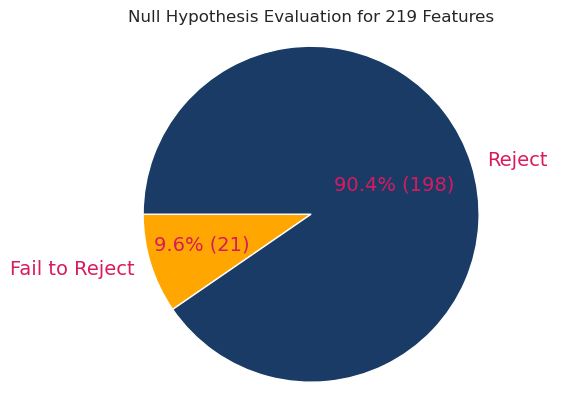

In [114]:
from functools import partial

def make_autopct(values, pct):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}% ({val:d})'

categories = ['Fail to Reject','Reject']
values = [len(fail_to_reject_null_hypotheses['p-val']), len(reject_null_hypotheses['p-val'])]
autopct_func = partial(make_autopct, values)

colours = [ '#FFA700', '#193B66']
textprops = {'fontsize': 14, 'color': '#D81B60'}

wedges, texts, autotexts = plt.pie(values, labels=categories, autopct=autopct_func, startangle=180, colors=colours, textprops=textprops)

for autotext in autotexts:
    x, y = autotext.get_position()
    autotext.set_position((x - 0.08, y))


plt.axis('equal')
plt.title(f'Null Hypothesis Evaluation for {len(feature_scores)} Features')
plt.savefig('Null_Hypothesis_Evaluation_pie.png', bbox_inches='tight')
plt.show()

 The most significant associations, sort by the smallest p-value and then rank (chi-square score descending)

In [121]:
p_vals_df2 = pd.DataFrame([p_values]).transpose()
pd_vals_df = pd.DataFrame({'p-value': p_vals_df2[0]}, index=p_vals_df2.index)
pd.options.display.float_format = "{:.4f}".format
stats_p = pd.merge(stats,pd_vals_df,how='inner',left_index=True,right_index=True).sort_values(by=['p-value','rank'])
stats_p

,0,percentage_all,percentage_severe,score,rank,p-value
Vehicle_Type_Motorcycle,173110,8.4099,2.4223,21083.7224,1.0000,0.0000
Speed_limit_60,317097,15.4050,3.5119,13148.4425,2.0000,0.0000
X1st_Point_of_Impact_back,388912,18.8938,1.4149,10165.7382,3.0000,0.0000
Vehicle_Manoeuvre_waiting_to_go_held_up,145922,7.0891,0.3758,6738.2017,4.0000,0.0000
Light_Conditions_darkness_no_lighting,99708,4.8439,1.2070,6528.5329,5.0000,0.0000
...,...,...,...,...,...,...
Special_Conditions_at_Site_road_sign_or_marking_defective_or_obscured,3197,0.1553,0.0222,0.1191,216.0000,0.9271
Speed_limit_15,11,0.0005,0.0000,0.0202,219.0000,0.9556
Hit_Object_in_Carriageway_bridge_(roof),368,0.0179,0.0026,0.8146,207.0000,0.9808
Road_Type_data_missing_or_out_of_range,2,0.0001,0.0000,0.3325,212.0000,1.0000


# Machine Learning Model

## Recursive Feature Elimination (RFE)

In [129]:
Y = pd.DataFrame(merged.Accident_Severity.to_frame().values.reshape(-1, 1),columns=['Accident_Severity'])
X = merged.drop('Accident_Severity', axis=1)
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'Y has {Y.shape[0]} rows and {Y.shape[1]} columns')

X has 2058408 rows and 219 columns
Y has 2058408 rows and 1 columns


Score for 219 features: 0.2929
Score for 213 features: 0.2928
Score for 207 features: 0.2928
Score for 200 features: 0.2927
Score for 194 features: 0.2927
Score for 187 features: 0.2924
Score for 181 features: 0.2925
Score for 175 features: 0.2924
Score for 168 features: 0.2922
Score for 162 features: 0.2908
Score for 155 features: 0.2910
Score for 149 features: 0.2911
Score for 143 features: 0.2900
Score for 136 features: 0.2894
Score for 130 features: 0.2893
Score for 123 features: 0.2888
Score for 117 features: 0.2878
Score for 110 features: 0.2874
Score for 104 features: 0.2873
Score for 98 features: 0.2871
Score for 91 features: 0.2868
Score for 85 features: 0.2846
Score for 78 features: 0.2814
Score for 72 features: 0.2800
Score for 66 features: 0.2781
Score for 59 features: 0.2750
Score for 53 features: 0.2716
Score for 46 features: 0.2673
Score for 40 features: 0.2542
Score for 34 features: 0.2211
Score for 27 features: 0.1976
Score for 21 features: 0.1733
Score for 14 features

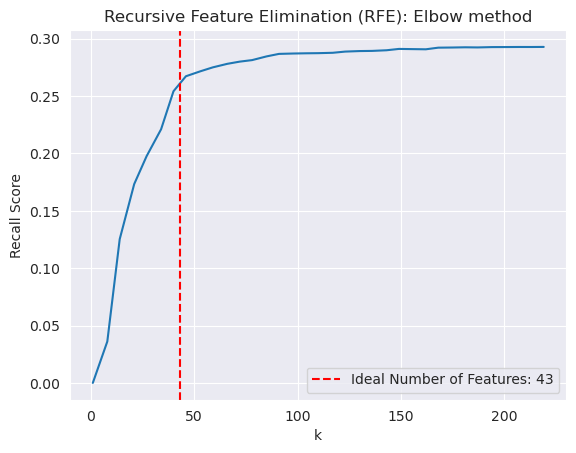

In [133]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=random_state)

scores = []
k_value = []
k_selected_names = {}
k_scores = {}
max_iterations = 35
for n in reversed(np.ceil(np.linspace(1, len(X.columns), max_iterations)).astype(int)):

    selector = SelectKBest(chi2, k=n)  # select top n features
    selector.fit(X_train, y_train)

    selected_indices = selector.get_support(indices=True)
    selected_names = X_train.columns[selected_indices]

    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Train logistic regression model using selected features
    #model = LogisticRegression()
    model = BernoulliNB()
    model.fit(X_train_selected, y_train)

    # Evaluate model on test set
    y_test_pred = model.predict(X_test_selected)
    score =  recall_score(y_test, y_test_pred)
    print(f'Score for {n} features: {score:.4f}')
    scores.append(score)
    k_value.append(n)
    k_selected_names[n] = selected_names
    k_scores[n] = score

scores_df = pd.DataFrame(columns=['k','score'])
scores_df['k'] = k_value
scores_df['score'] = scores

plt.plot(scores_df['k'], scores_df['score'])
plt.xlabel('k')
plt.ylabel('Recall Score')
plt.title('Recursive Feature Elimination (RFE): Elbow method')
plt.axvline(x=43, color='r', linestyle='--', label='Ideal Number of Features: 43')
plt.legend()
plt.savefig('Figure_Recursive Feature Elimination.png', bbox_inches='tight')
plt.show()

best_k = max(k_scores, key=k_scores.get)
selected_features = k_selected_names[best_k]
#print(f'Selected Features (k={best_k}: {selected_features}')

Due to know the chart is plotted, it's more of a knee than an elbow, but the ideal number of features is about 43.

## Data Splitting

In [ ]:
#X_categorical_data = merged.drop(columns=numerical_columns)
#X_categorical_data = merged.drop(columns=['Accident_Severity'])
#categorical_columns = X_categorical_data.columns
#X_categorical_data

In [167]:
from sklearn.model_selection import train_test_split

Y = pd.DataFrame(merged.Accident_Severity.to_frame().values.reshape(-1, 1),columns=['Accident_Severity'])
X = merged[selected_features] #mca_15_components #merged.drop('Accident_Severity', axis=1)

X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'Y has {Y.shape[0]} rows and {Y.shape[1]} columns')

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, #numerical_reduced_pca
    train_size=0.7,
   # stratify=X.Vehicle_Type,
    random_state=random_state)

X has 2058408 rows and 1 columns
Y has 2058408 rows and 1 columns




## Algorithm Selection

In [115]:
from tabulate import tabulate

# Calculate accuracy, precision, recall, and F1-score
def print_scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics in a table
    table = [
        ['Accuracy', f'{accuracy:.4f}'],
        ['Precision', f'{precision:.4f}'],
        ['Recall', f'{recall:.4f}'],
        ['F1-score', f'{f1:.4f}']
    ]

    return tabulate(table, headers=['Metric', 'Value'], tablefmt='grid')

def fit_score_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    table = print_scores(y_test,y_pred)
    return model, table


### Logistic Regression

In [158]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model, table = fit_score_model(model, X_train, X_test, y_train, y_test)
print(table)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |  0.8585 |
+-----------+---------+
| Precision |  0.7371 |
+-----------+---------+
| Recall    |  0.8585 |
+-----------+---------+
| F1-score  |  0.7932 |
+-----------+---------+


### Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5,n_estimators=50)
model, table = fit_score_model(model, X_train, X_test, y_train, y_test)
print(table)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |  0.8585 |
+-----------+---------+
| Precision |  0.7371 |
+-----------+---------+
| Recall    |  0.8585 |
+-----------+---------+
| F1-score  |  0.7932 |
+-----------+---------+


### Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth =200)
model, table = fit_score_model(model, X_train, X_test, y_train, y_test)
print(table)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |  0.7557 |
+-----------+---------+
| Precision |  0.7691 |
+-----------+---------+
| Recall    |  0.7557 |
+-----------+---------+
| F1-score  |  0.7622 |
+-----------+---------+


In [147]:
### XGB Boosting Classifier

In [118]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=2,n_estimators=50)
model, table = fit_score_model(model, X_train, X_test, y_train, y_test)
print(table)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |  0.8585 |
+-----------+---------+
| Precision |  0.7371 |
+-----------+---------+
| Recall    |  0.8585 |
+-----------+---------+
| F1-score  |  0.7932 |
+-----------+---------+



## Hyperparameter Tuning

Grid Search CV is used to find the best combination of hyperparameters for a model. It works by evaluating the performance of a model with different hyperparameters on a validation set, and selecting the combination of hyperparameters that yields the best performance.

In [152]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from xgboost import XGBClassifier

# Define the XGBClassifier object with gpu_hist tree method
xgb_cv = XGBClassifier()#tree_method="gpu_hist")

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}

# Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=xgb_cv, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search = HalvingRandomSearchCV(xgb_cv, param_distributions=param_grid, scoring='f1_macro',cv=3,n_candidates='exhaust',factor=2, n_jobs=-1, verbose=1)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train.values.ravel())

# Get the best estimator and print it
best_estimator = grid_search.best_estimator_
print('Best estimator:', best_estimator)

# Get the best parameters and print them
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# Get the best score and print it
best_score = grid_search.best_score_
print('Best score:', best_score)


n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 18
min_resources_: 12
max_resources_: 1646726
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 576
n_resources: 12
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
----------
iter: 1
n_candidates: 288
n_resources: 24
Fitting 3 folds for each of 288 candidates, totalling 864 fits
----------
iter: 2
n_candidates: 144
n_resources: 48
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 3
n_candidates: 72
n_resources: 96
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 4
n_candidates: 36
n_resources: 192
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 5
n_candidates: 18
n_resources: 384
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 6
n_candidates: 9
n_resources: 768
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 7
n_candidates: 5
n_resourc